<a href="https://colab.research.google.com/github/M-6J/huping/blob/main/github-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3820231102-KIMMINJUN

从Kaggle到Colab下载数据集

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'github-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2924217%2F5095439%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240321%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240321T092659Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1597a845d4807b0d577e27758edcd3cfdec9e89c3d0270f457ec79c6cd906070fbfe0ecc983c37cdbe95d6505bc6316fcb1d1214abd1aba461f6740d8eee0d0aac6e9f46e2cbbb919be764d0c58813b43ab021568216a92d92dbdcbf9858fa9802bbf286dc830edea7deabe94e5a922cc57230f3d9d5edd4e9d31d12f6ff86e632e63683a4651219dda87113bfd7225be1faefc395beadc8618412f7a8ca74640441764e59ea1be9dae635c08038cc78e7832ee042f66097930f46ae468b312c10d2996f60fd61015662ab2ca4909671ab332e28259979be3b6dd8aa46996c91dd56711f26236b6fa7ad3d6acc294acc75c9de7839db4aaf569c8b721d7000b8'

DATASET_PATH='/content'


for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(DATASET_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 79399228 bytes downloaded
Downloaded and uncompressed: github-dataset
Data source import complete.


## 1. 数据摘要

### Columns

`repositories` - the name of the repository (Format - github_username/repository_name)

`stars_count` - stars count of the repository

`forks_count` - fork count of the repository

`issues_count` - active/opened issues in the repository

`pull_requests` - pull requests opened in the repository

`contributors` - contributors contribute to the project so far

`language` - primary language used in the project

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Load data set.
github_data = pd.read_csv('/content/github-dataset/github_dataset.csv')

# Check the columns.
github_data.columns

Index(['repositories', 'stars_count', 'forks_count', 'issues_count',
       'pull_requests', 'contributors', 'language'],
      dtype='object')

In [ ]:
# Show first five rows as an example.
github_data.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby


### 标称属性

`repositories` - the name of the repository (Format - github_username/repository_name)

`language` - primary language used in the project

#### *频数 -- `repositories`*

In [ ]:
github_data['repositories'].value_counts()

kameshsampath/ansible-role-rosa-demos         2
aloisdeniel/bluff                             2
antoniaandreou/github-slideshow               2
jgthms/bulma-start                            2
artkirienko/hlds-docker-dproto                2
                                             ..
WhiteHouse/CIOmanagement                      1
0xCaso/defillama-telegram-bot                 1
ethereum/blake2b-py                           1
openfoodfacts/folksonomy_mobile_experiment    1
gamemann/All_PropHealth                       1
Name: repositories, Length: 972, dtype: int64

#### *频数 -- `language`*

In [ ]:
github_data['language'].value_counts()

JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift                10
C#                    8
Objective-C           8
Kotlin                7
Makefile              6
Jinja                 5
SCSS                  4
CoffeeScript          3
Perl                  3
Dockerfile            3
Solidity              3
AutoHotkey            3
Hack                  2
Pawn                  2
CodeQL                2
PowerShell            2
Assembly              2
Vim Script            2
Vue                   2
Elixir                2
Gherkin               1
QMake                 1
CMake                 1
Oz                    1
Cuda                  1
QML                   1
ActionScript    

### 数值属性

`stars_count` - stars count of the repository

`forks_count` - fork count of the repository

`issues_count` - active/opened issues in the repository

`pull_requests` - pull requests opened in the repository

`contributors` - contributors contribute to the project so far

In [ ]:
numeric_github_data = pd.DataFrame(github_data, columns=['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors'])
numeric_github_data.head()

,stars_count,forks_count,issues_count,pull_requests,contributors
0,0,0,612,316,2
1,271,150,536,6,71
2,0,0,313,27,154
3,0,0,290,30,434
4,0,589,202,22,67


In [ ]:
github_data['stars_count'].describe()

count    1052.000000
mean       81.976236
std       170.403116
min         0.000000
25%         1.000000
50%        12.000000
75%        65.250000
max       995.000000
Name: stars_count, dtype: float64

In [ ]:
numeric_describe = numeric_github_data.describe()
numeric_describe

,stars_count,forks_count,issues_count,pull_requests,contributors
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000
mean,81.976236,53.884981,8.656844,4.374525,8.364068
std,170.403116,127.699729,32.445154,27.913732,37.511807
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000
50%,12.000000,6.000000,2.000000,0.000000,2.000000
75%,65.250000,38.250000,6.000000,2.000000,4.000000
max,995.000000,973.000000,612.000000,567.000000,658.000000


#### *5数概括 -- `stars_count`, `forks_count`, `issues_count`, `pull_requests`, `contributors`*

In [ ]:
numeric_describe.loc[['mean', '25%', '50%', '75%', 'max']]

,stars_count,forks_count,issues_count,pull_requests,contributors
mean,81.976236,53.884981,8.656844,4.374525,8.364068
25%,1.000000,1.000000,1.000000,0.000000,0.000000
50%,12.000000,6.000000,2.000000,0.000000,2.000000
75%,65.250000,38.250000,6.000000,2.000000,4.000000
max,995.000000,973.000000,612.000000,567.000000,658.000000


#### *缺失值*

In [ ]:
NaN_counts = github_data.isna().sum()
NaN_counts = pd.DataFrame(NaN_counts, columns=['NaN_counts']).T
NaN_counts

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
NaN_counts,0,0,0,0,0,0,145


## 2. 数据可视化
#### `repositories`

###直方图

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
repo_counts = pd.DataFrame(github_data['repositories'].value_counts())
repo_counts

,repositories
kameshsampath/ansible-role-rosa-demos,2
aloisdeniel/bluff,2
antoniaandreou/github-slideshow,2
jgthms/bulma-start,2
artkirienko/hlds-docker-dproto,2
...,...
WhiteHouse/CIOmanagement,1
0xCaso/defillama-telegram-bot,1
ethereum/blake2b-py,1
openfoodfacts/folksonomy_mobile_experiment,1


In [ ]:
repo_counts.index

Index(['kameshsampath/ansible-role-rosa-demos', 'aloisdeniel/bluff',
       'antoniaandreou/github-slideshow', 'jgthms/bulma-start',
       'artkirienko/hlds-docker-dproto', 'artkirienko/int-null-even',
       'KrauseFx/dotfiles', 'carloscuesta/gitmoji', 'divyamagwl/Depocalypse',
       'ritwickdey/Cake-Shop',
       ...
       'trailofbits/circuitous-benchmarks', 'Clueless-Community/Datasets',
       'ethereum/beacon_chain', 'openfoodfacts/eu-food-data',
       'jonfroehlich/jonfroehlich.github.io', 'WhiteHouse/CIOmanagement',
       '0xCaso/defillama-telegram-bot', 'ethereum/blake2b-py',
       'openfoodfacts/folksonomy_mobile_experiment',
       'gamemann/All_PropHealth'],
      dtype='object', length=972)

In [ ]:
repo_counts.T

,kameshsampath/ansible-role-rosa-demos,aloisdeniel/bluff,antoniaandreou/github-slideshow,jgthms/bulma-start,artkirienko/hlds-docker-dproto,artkirienko/int-null-even,KrauseFx/dotfiles,carloscuesta/gitmoji,divyamagwl/Depocalypse,ritwickdey/Cake-Shop,...,trailofbits/circuitous-benchmarks,Clueless-Community/Datasets,ethereum/beacon_chain,openfoodfacts/eu-food-data,jonfroehlich/jonfroehlich.github.io,WhiteHouse/CIOmanagement,0xCaso/defillama-telegram-bot,ethereum/blake2b-py,openfoodfacts/folksonomy_mobile_experiment,gamemann/All_PropHealth
repositories,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
language_counts = pd.DataFrame(github_data['language'].value_counts()).sort_values(by='language', ascending=True).rename(columns={'language': 'language_count'})
language_counts

,language_count
SourcePawn,1
Gherkin,1
QMake,1
Oz,1
Cuda,1
QML,1
ActionScript,1
CMake,1
HCL,1
Roff,1


In [ ]:
language_counts.index

Index(['SourcePawn', 'Gherkin', 'QMake', 'Oz', 'Cuda', 'QML', 'ActionScript',
       'CMake', 'HCL', 'Roff', 'Svelte', 'Less', 'Haskell', 'Smarty',
       'PureBasic', 'R', 'Elixir', 'Vim Script', 'Assembly', 'PowerShell',
       'CodeQL', 'Pawn', 'Hack', 'Vue', 'AutoHotkey', 'Solidity', 'Perl',
       'CoffeeScript', 'Dockerfile', 'SCSS', 'Jinja', 'Makefile', 'Kotlin',
       'Objective-C', 'C#', 'Swift', 'Rust', 'Go', 'PHP', 'Shell', 'C', 'Ruby',
       'Jupyter Notebook', 'C++', 'Dart', 'TypeScript', 'CSS', 'Java', 'HTML',
       'Python', 'JavaScript'],
      dtype='object')

In [ ]:
pd.DataFrame(github_data['language'].value_counts()).T

,JavaScript,Python,HTML,Java,CSS,TypeScript,Dart,C++,Jupyter Notebook,Ruby,...,ActionScript,Roff,HCL,R,PureBasic,Smarty,Less,Svelte,Haskell,SourcePawn
language,253,155,72,44,37,37,36,29,29,28,...,1,1,1,1,1,1,1,1,1,1


<BarContainer object of 51 artists>

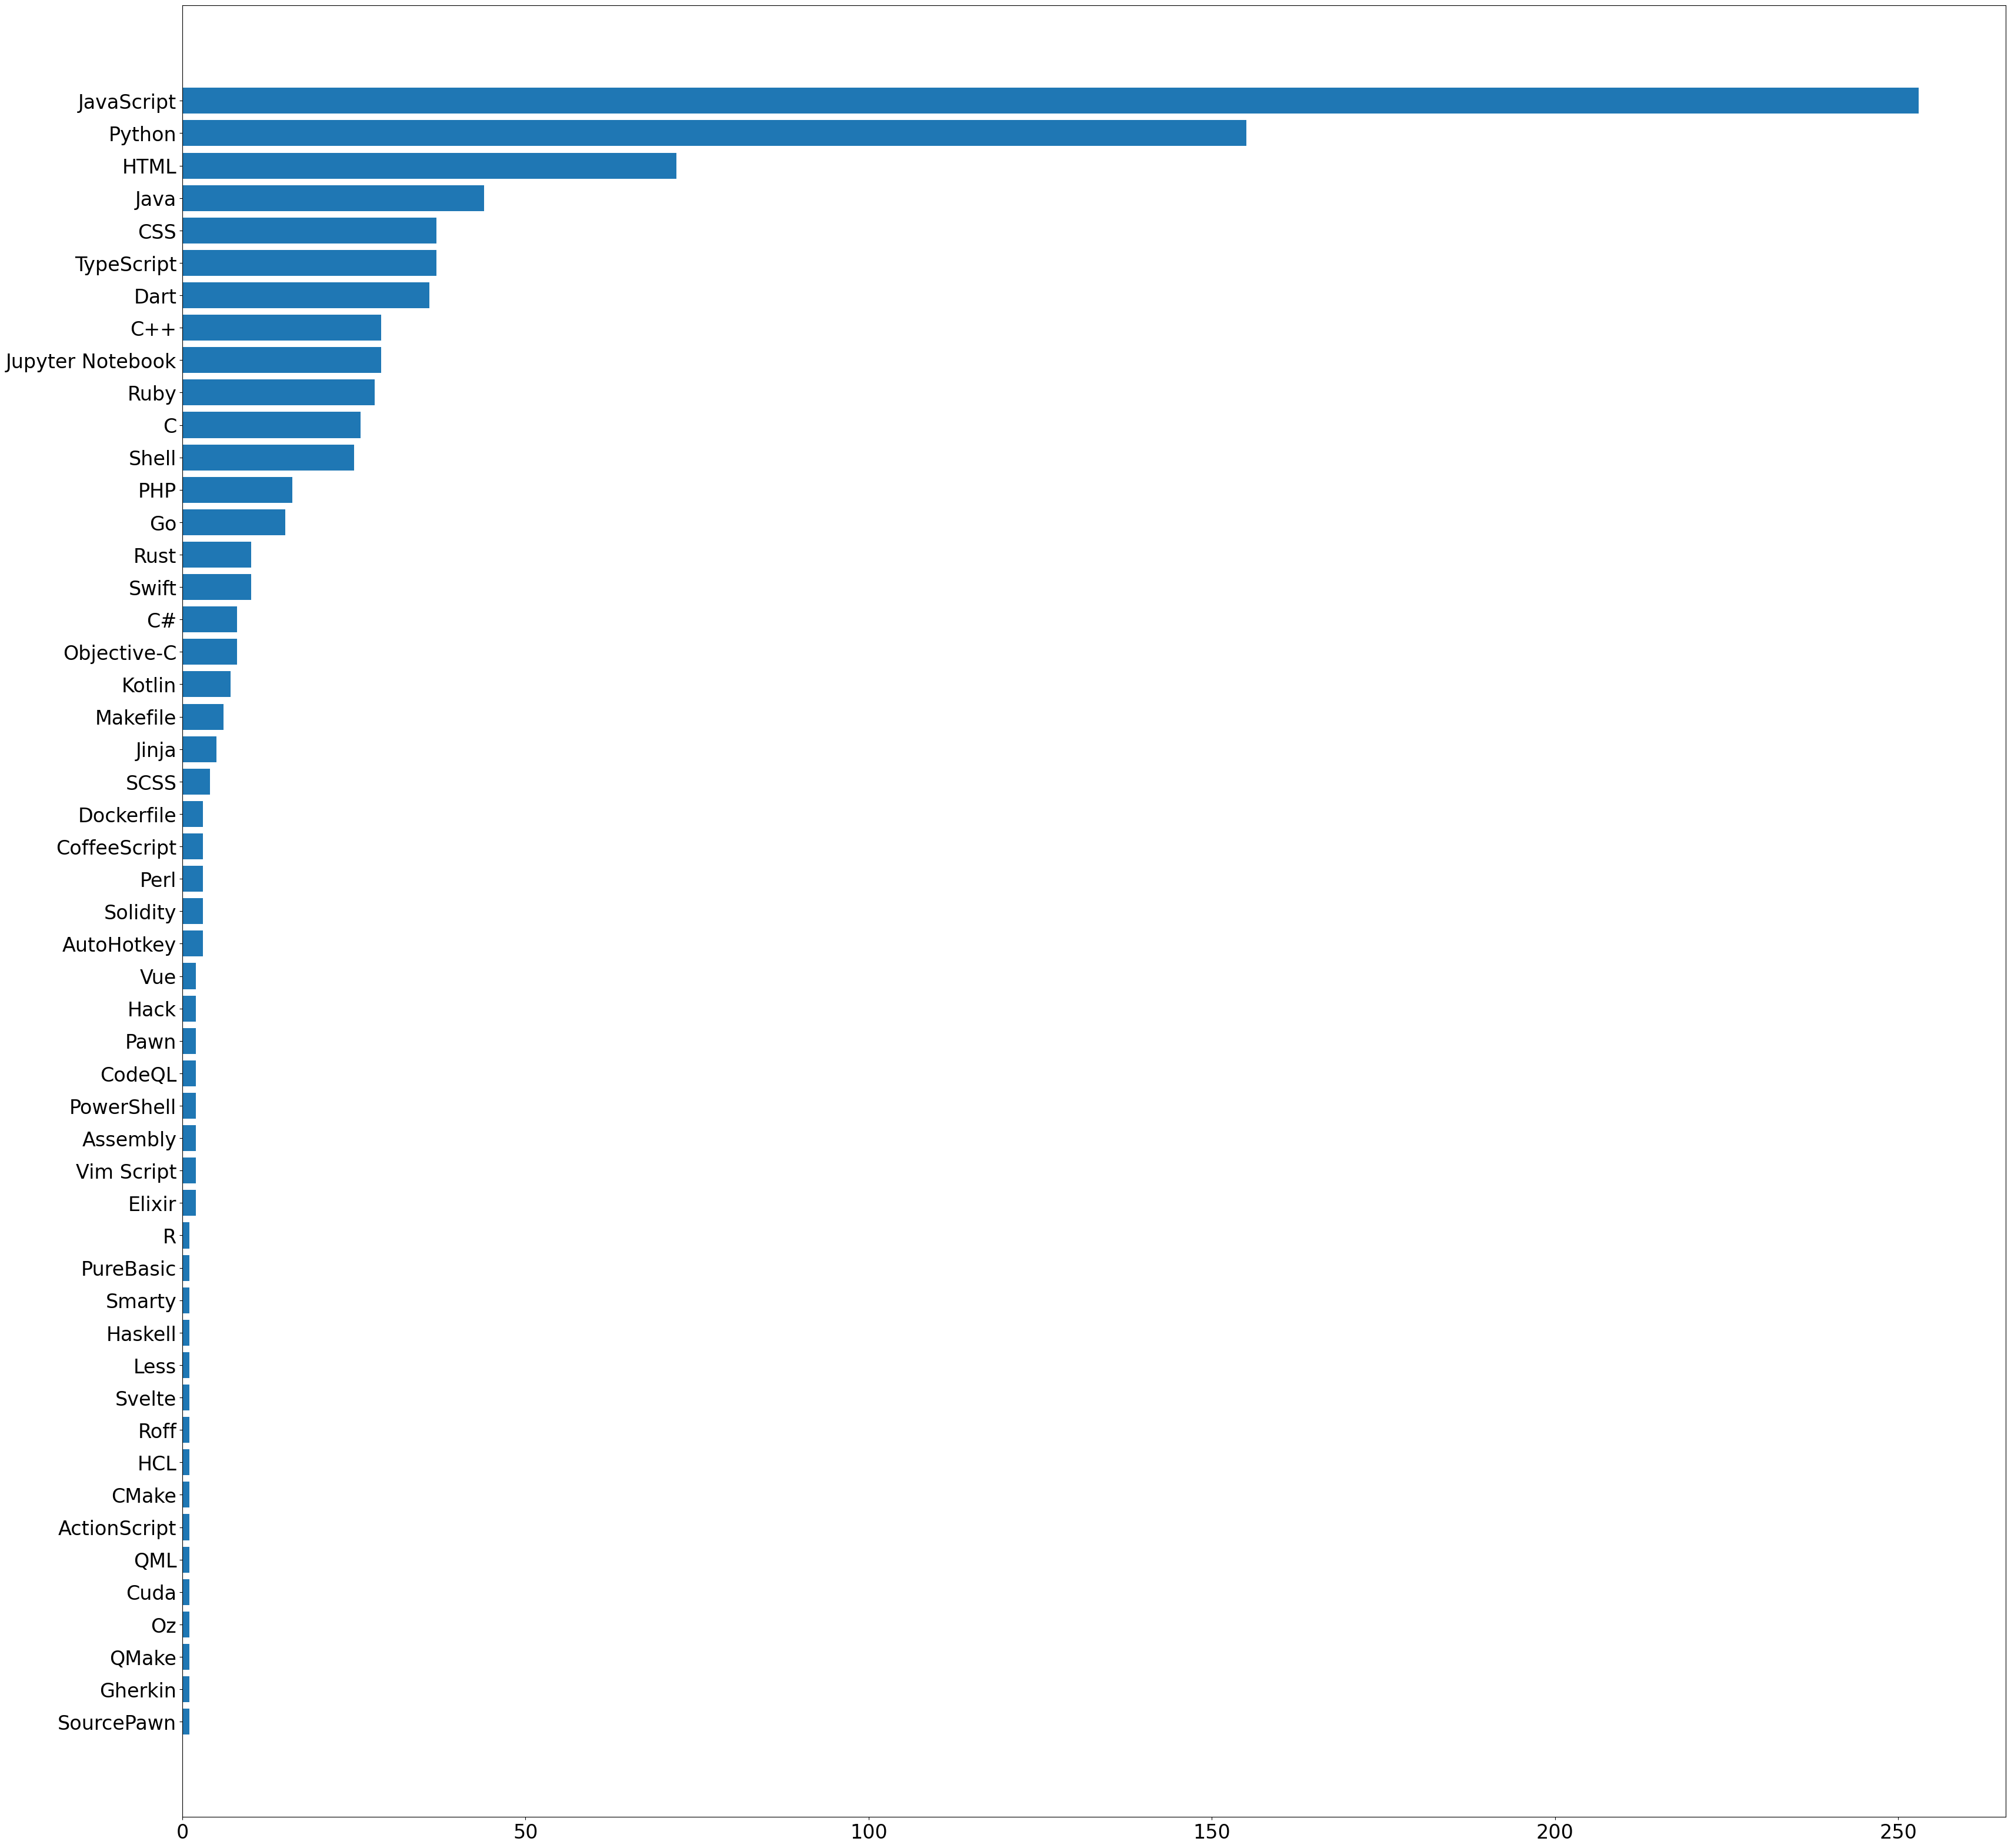

In [ ]:
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(language_counts.index, width=language_counts['language_count'])

In [ ]:
language_list = [np.nan]
encode_language_list = []
nan = np.nan
for language in github_data['language']:
    if language not in language_list:
        language_list.append(language)
    language = language_list.index(language)
encode_language_list.append(language)
print(language_list)
print(len(language_list))

[nan, 'C++', 'Python', 'Ruby', 'Java', 'CSS', 'Jinja', 'Dart', 'JavaScript', 'HTML', 'Objective-C', 'Kotlin', 'AutoHotkey', 'Go', 'Haskell', 'SCSS', 'Jupyter Notebook', 'Vue', 'Shell', 'Rust', 'PowerShell', 'C', 'C#', 'TypeScript', 'Svelte', 'Less', 'QML', 'CoffeeScript', 'Swift', 'Hack', 'PHP', 'Smarty', 'Solidity', 'Dockerfile', 'PureBasic', 'Vim Script', 'R', 'HCL', 'Perl', 'Makefile', 'Roff', 'ActionScript', 'CodeQL', 'Elixir', 'Oz', 'CMake', 'Assembly', 'Pawn', 'Gherkin', 'QMake', 'Cuda', 'SourcePawn']
52


In [ ]:
# github_data_encoded = github_data.insert(loc=len(github_data.columns), column='language_encoded', value=[l for l in encode_language_list])

###盒图

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-26-2ebd564df5b0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  stars_count_box = sns.catplot(data=github_data, kind='box', y='language', x='stars_count', height=20, palette='rocket')


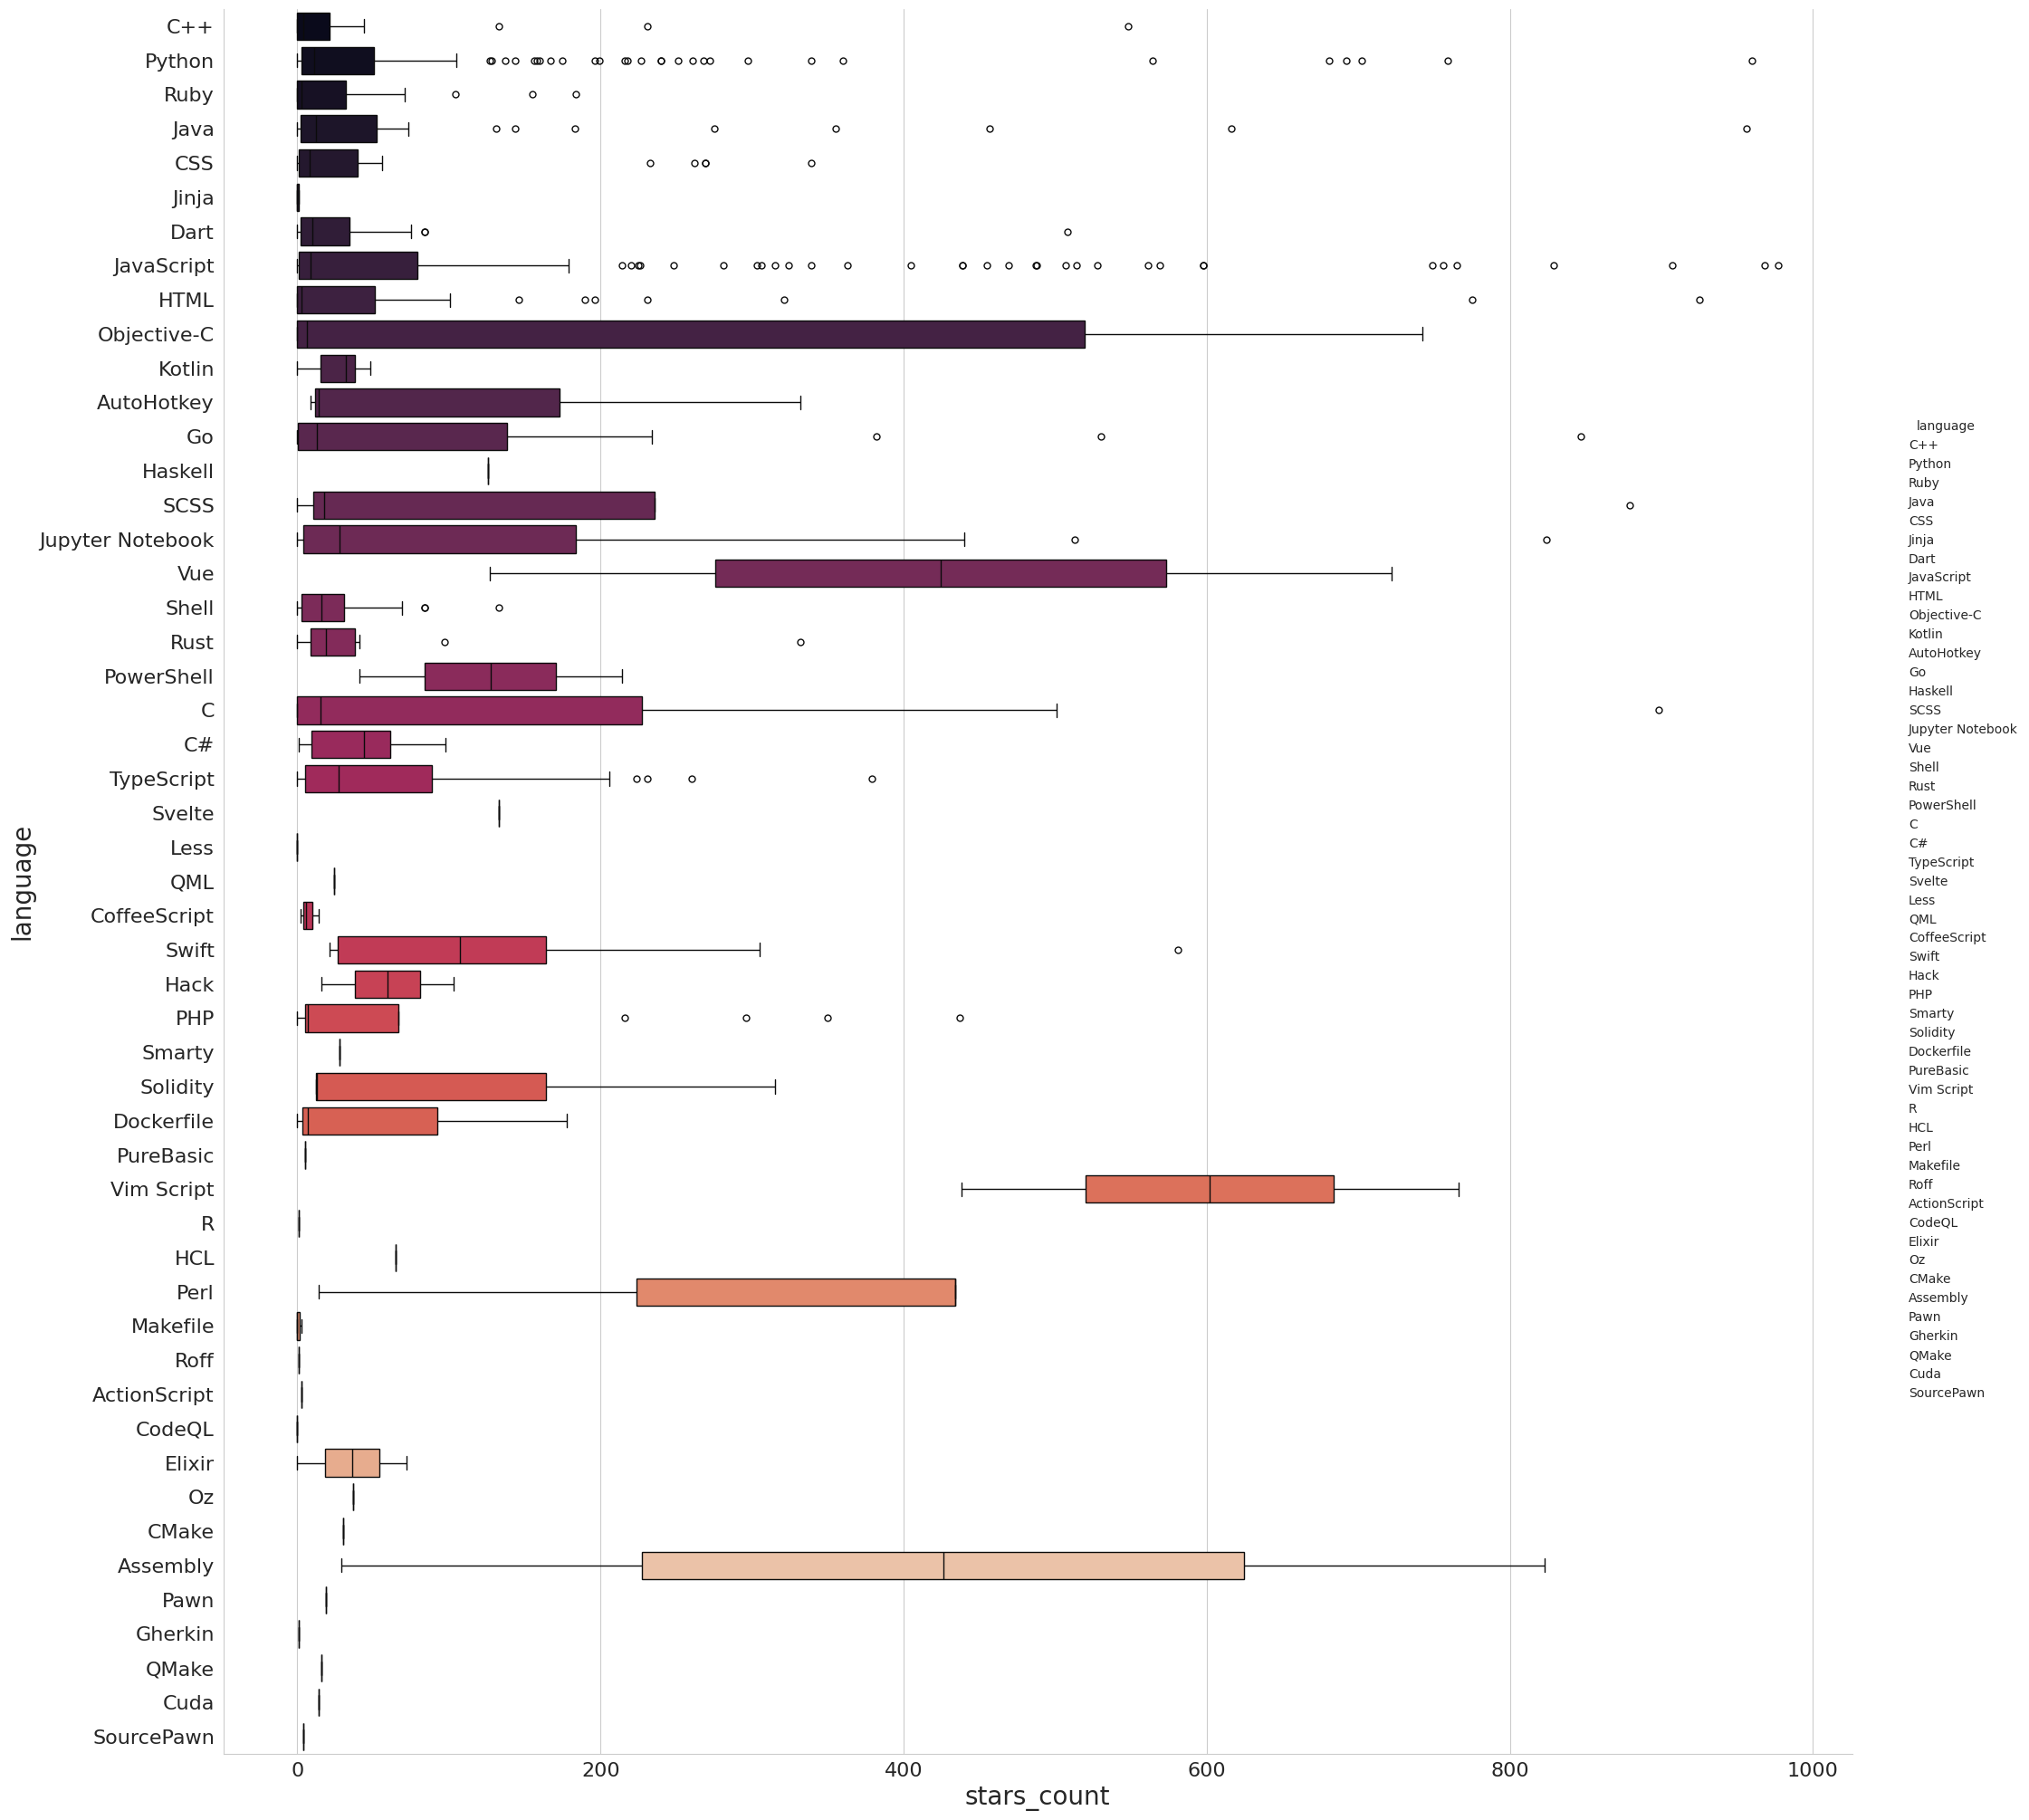

In [ ]:
sns.set_style("whitegrid")
stars_count_box = sns.catplot(data=github_data, kind='box', y='language', x='stars_count', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20)
plt.xlabel('stars_count', fontsize=20)
plt.show()

<ipython-input-28-6873045aa918>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  forks_count_box = sns.catplot(data=github_data, kind='box', y='language', x='forks_count', height=20, palette='rocket')


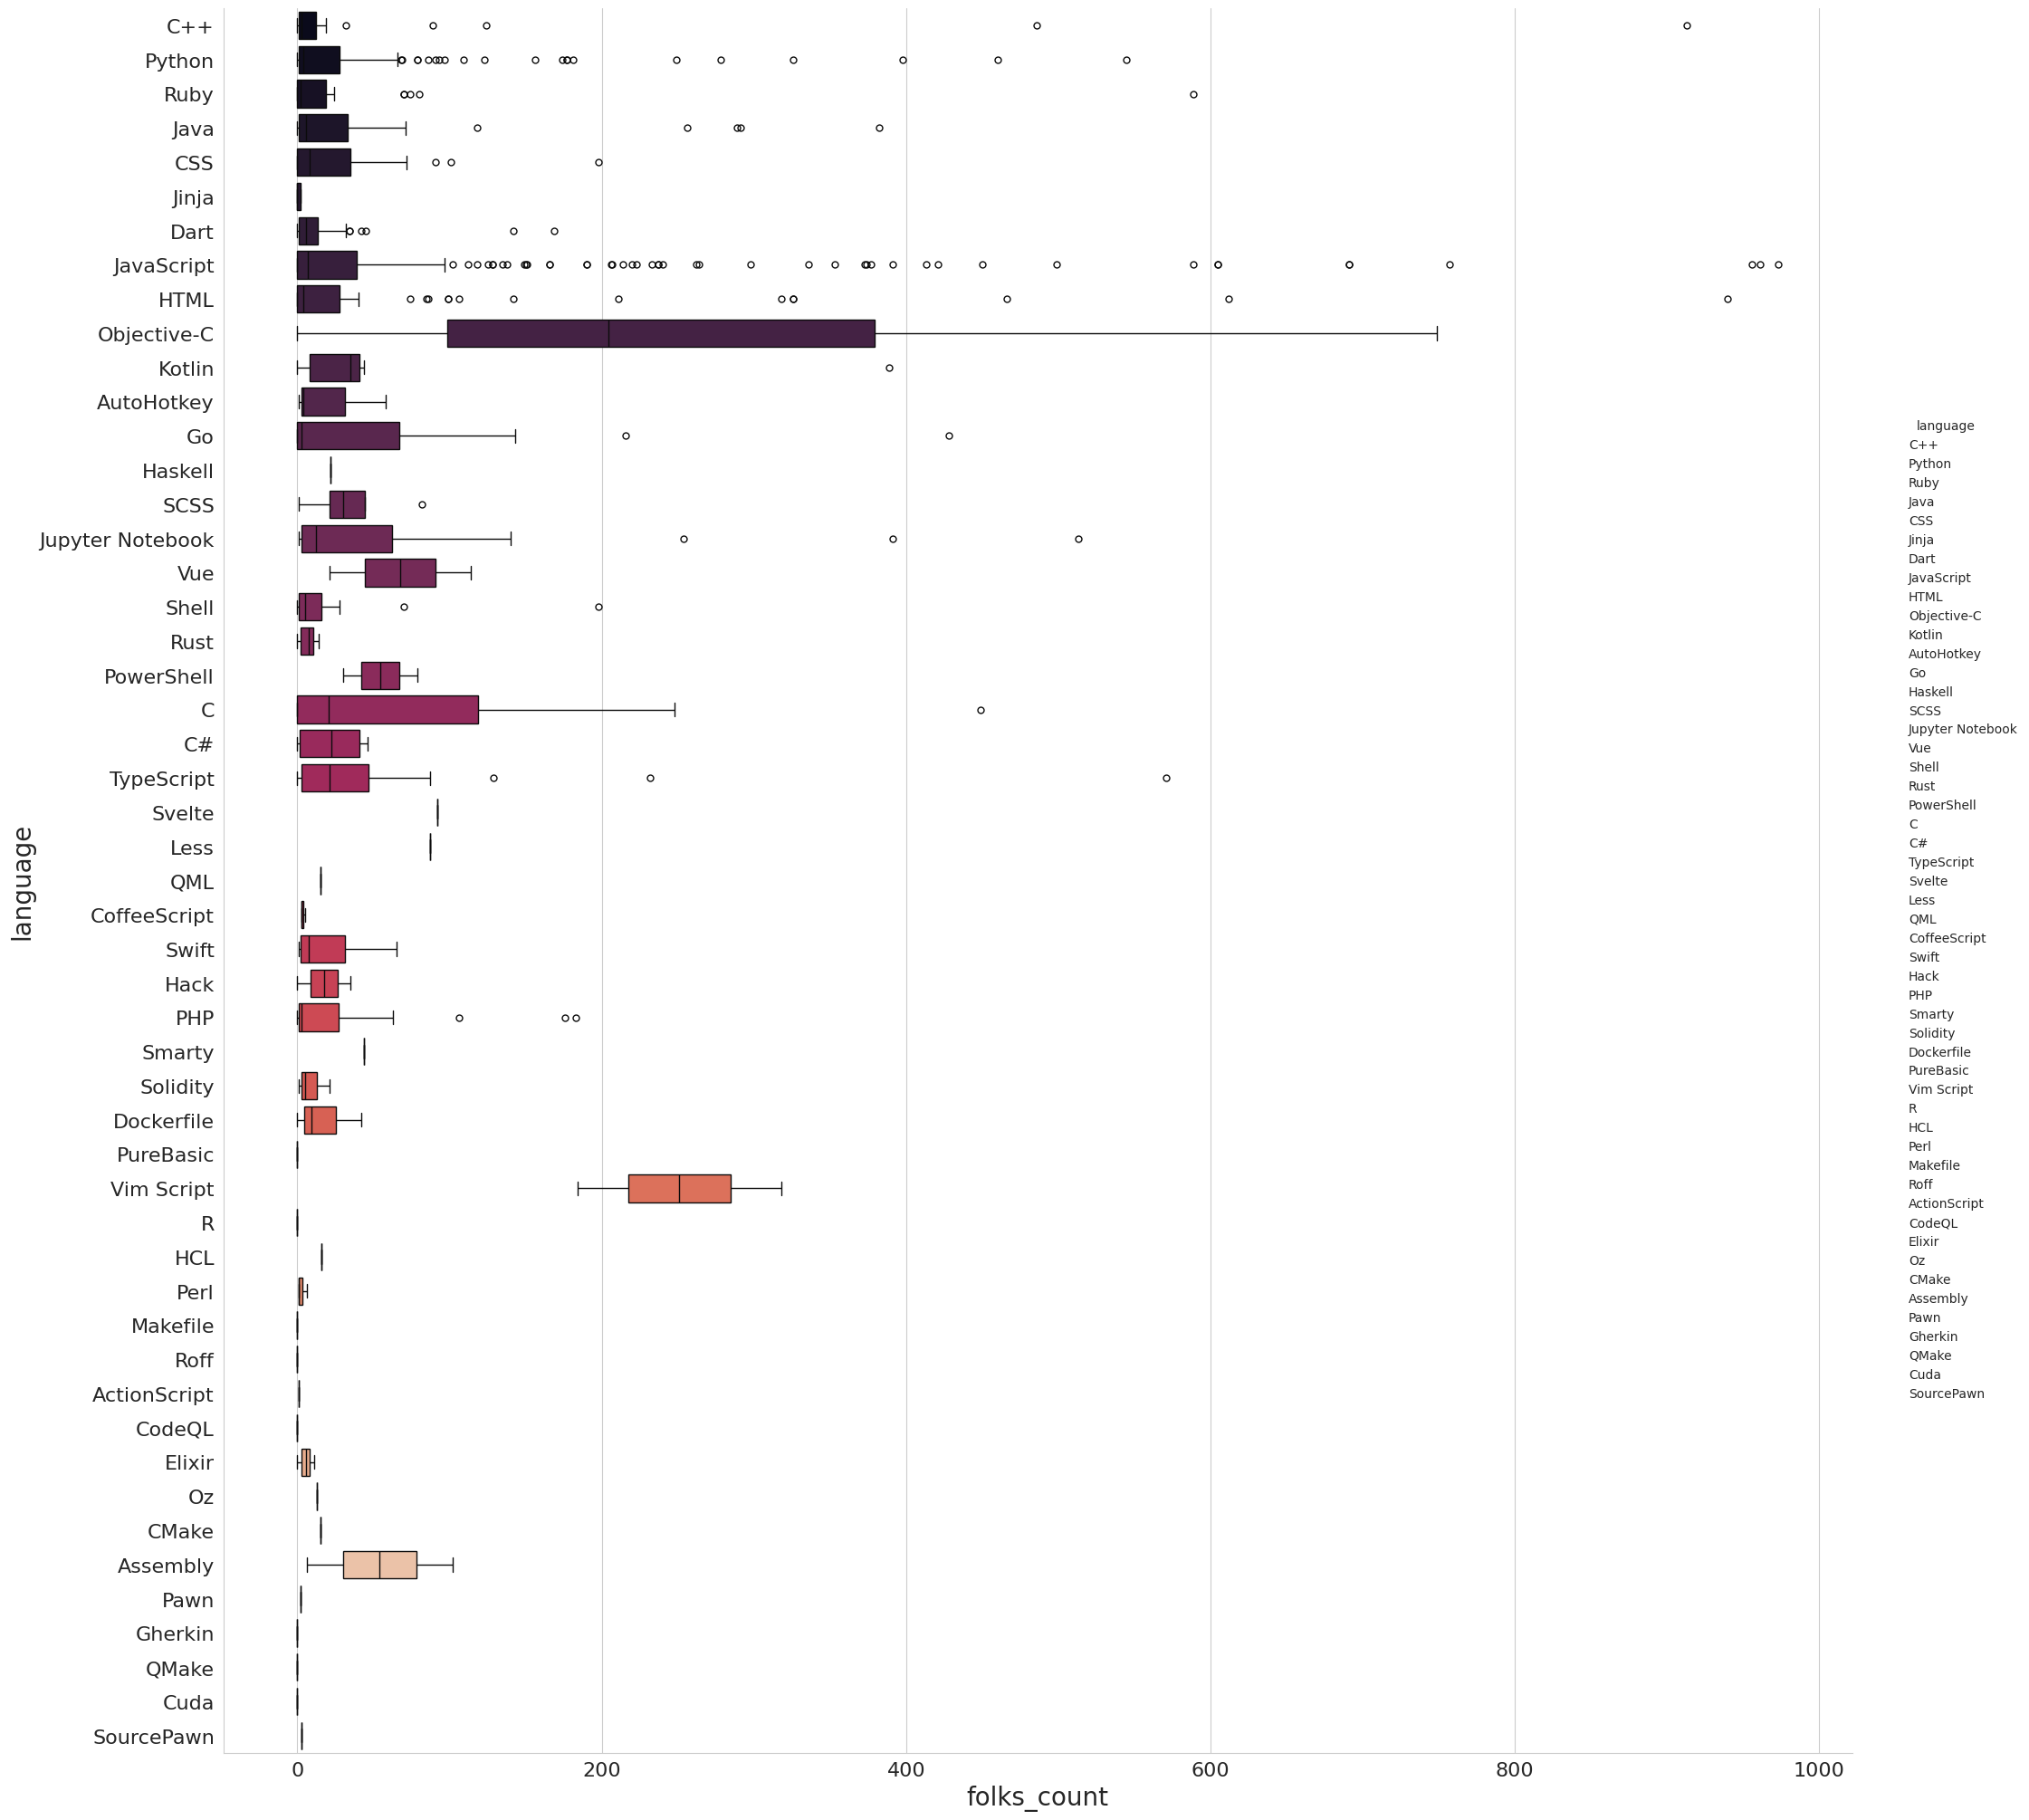

In [ ]:
sns.set_style("whitegrid")
forks_count_box = sns.catplot(data=github_data, kind='box', y='language', x='forks_count', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20)
plt.xlabel('folks_count', fontsize=20)
plt.show()

<ipython-input-29-96a2da9505be>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  issues_count_box = sns.catplot(data=github_data, kind='box', y='language', x='issues_count', height=20, palette='rocket')


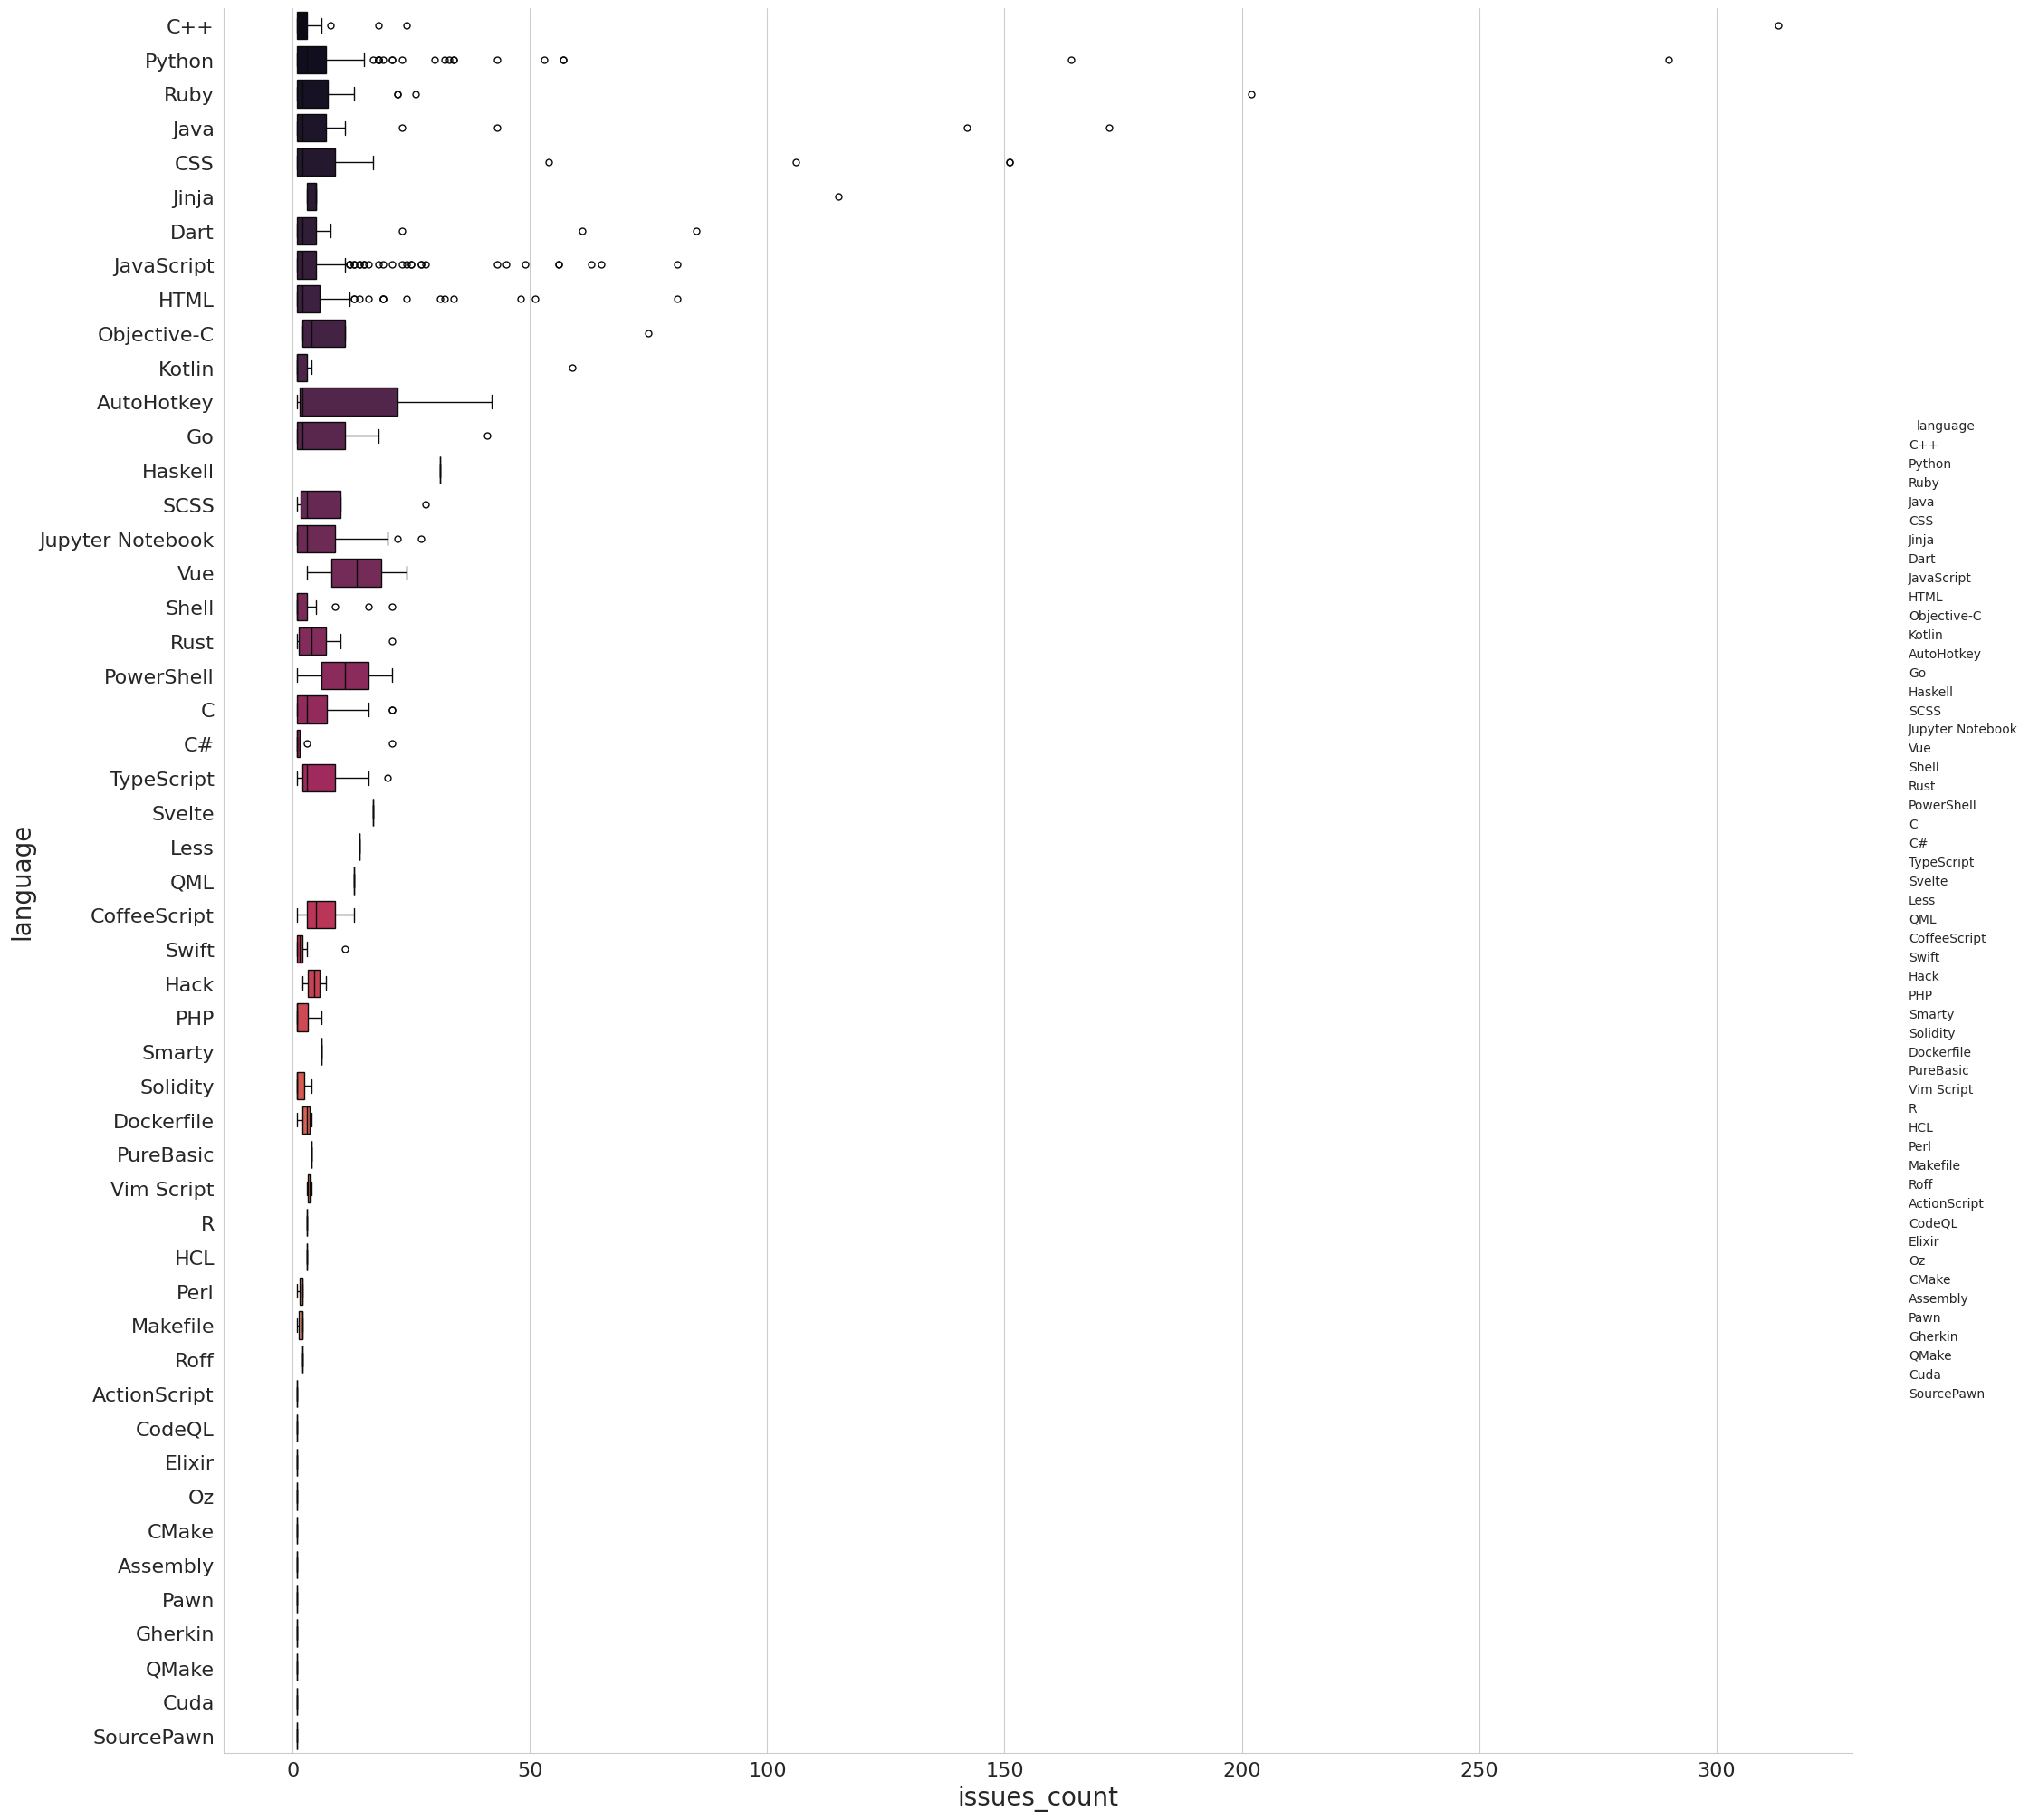

In [ ]:
sns.set_style("whitegrid")
issues_count_box = sns.catplot(data=github_data, kind='box', y='language', x='issues_count', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20)
plt.xlabel('issues_count', fontsize=20)
plt.show()

<ipython-input-30-e7ba697a24a8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  pull_requests_box = sns.catplot(data=github_data, kind='box', y='language', x='pull_requests', height=20, palette='rocket')


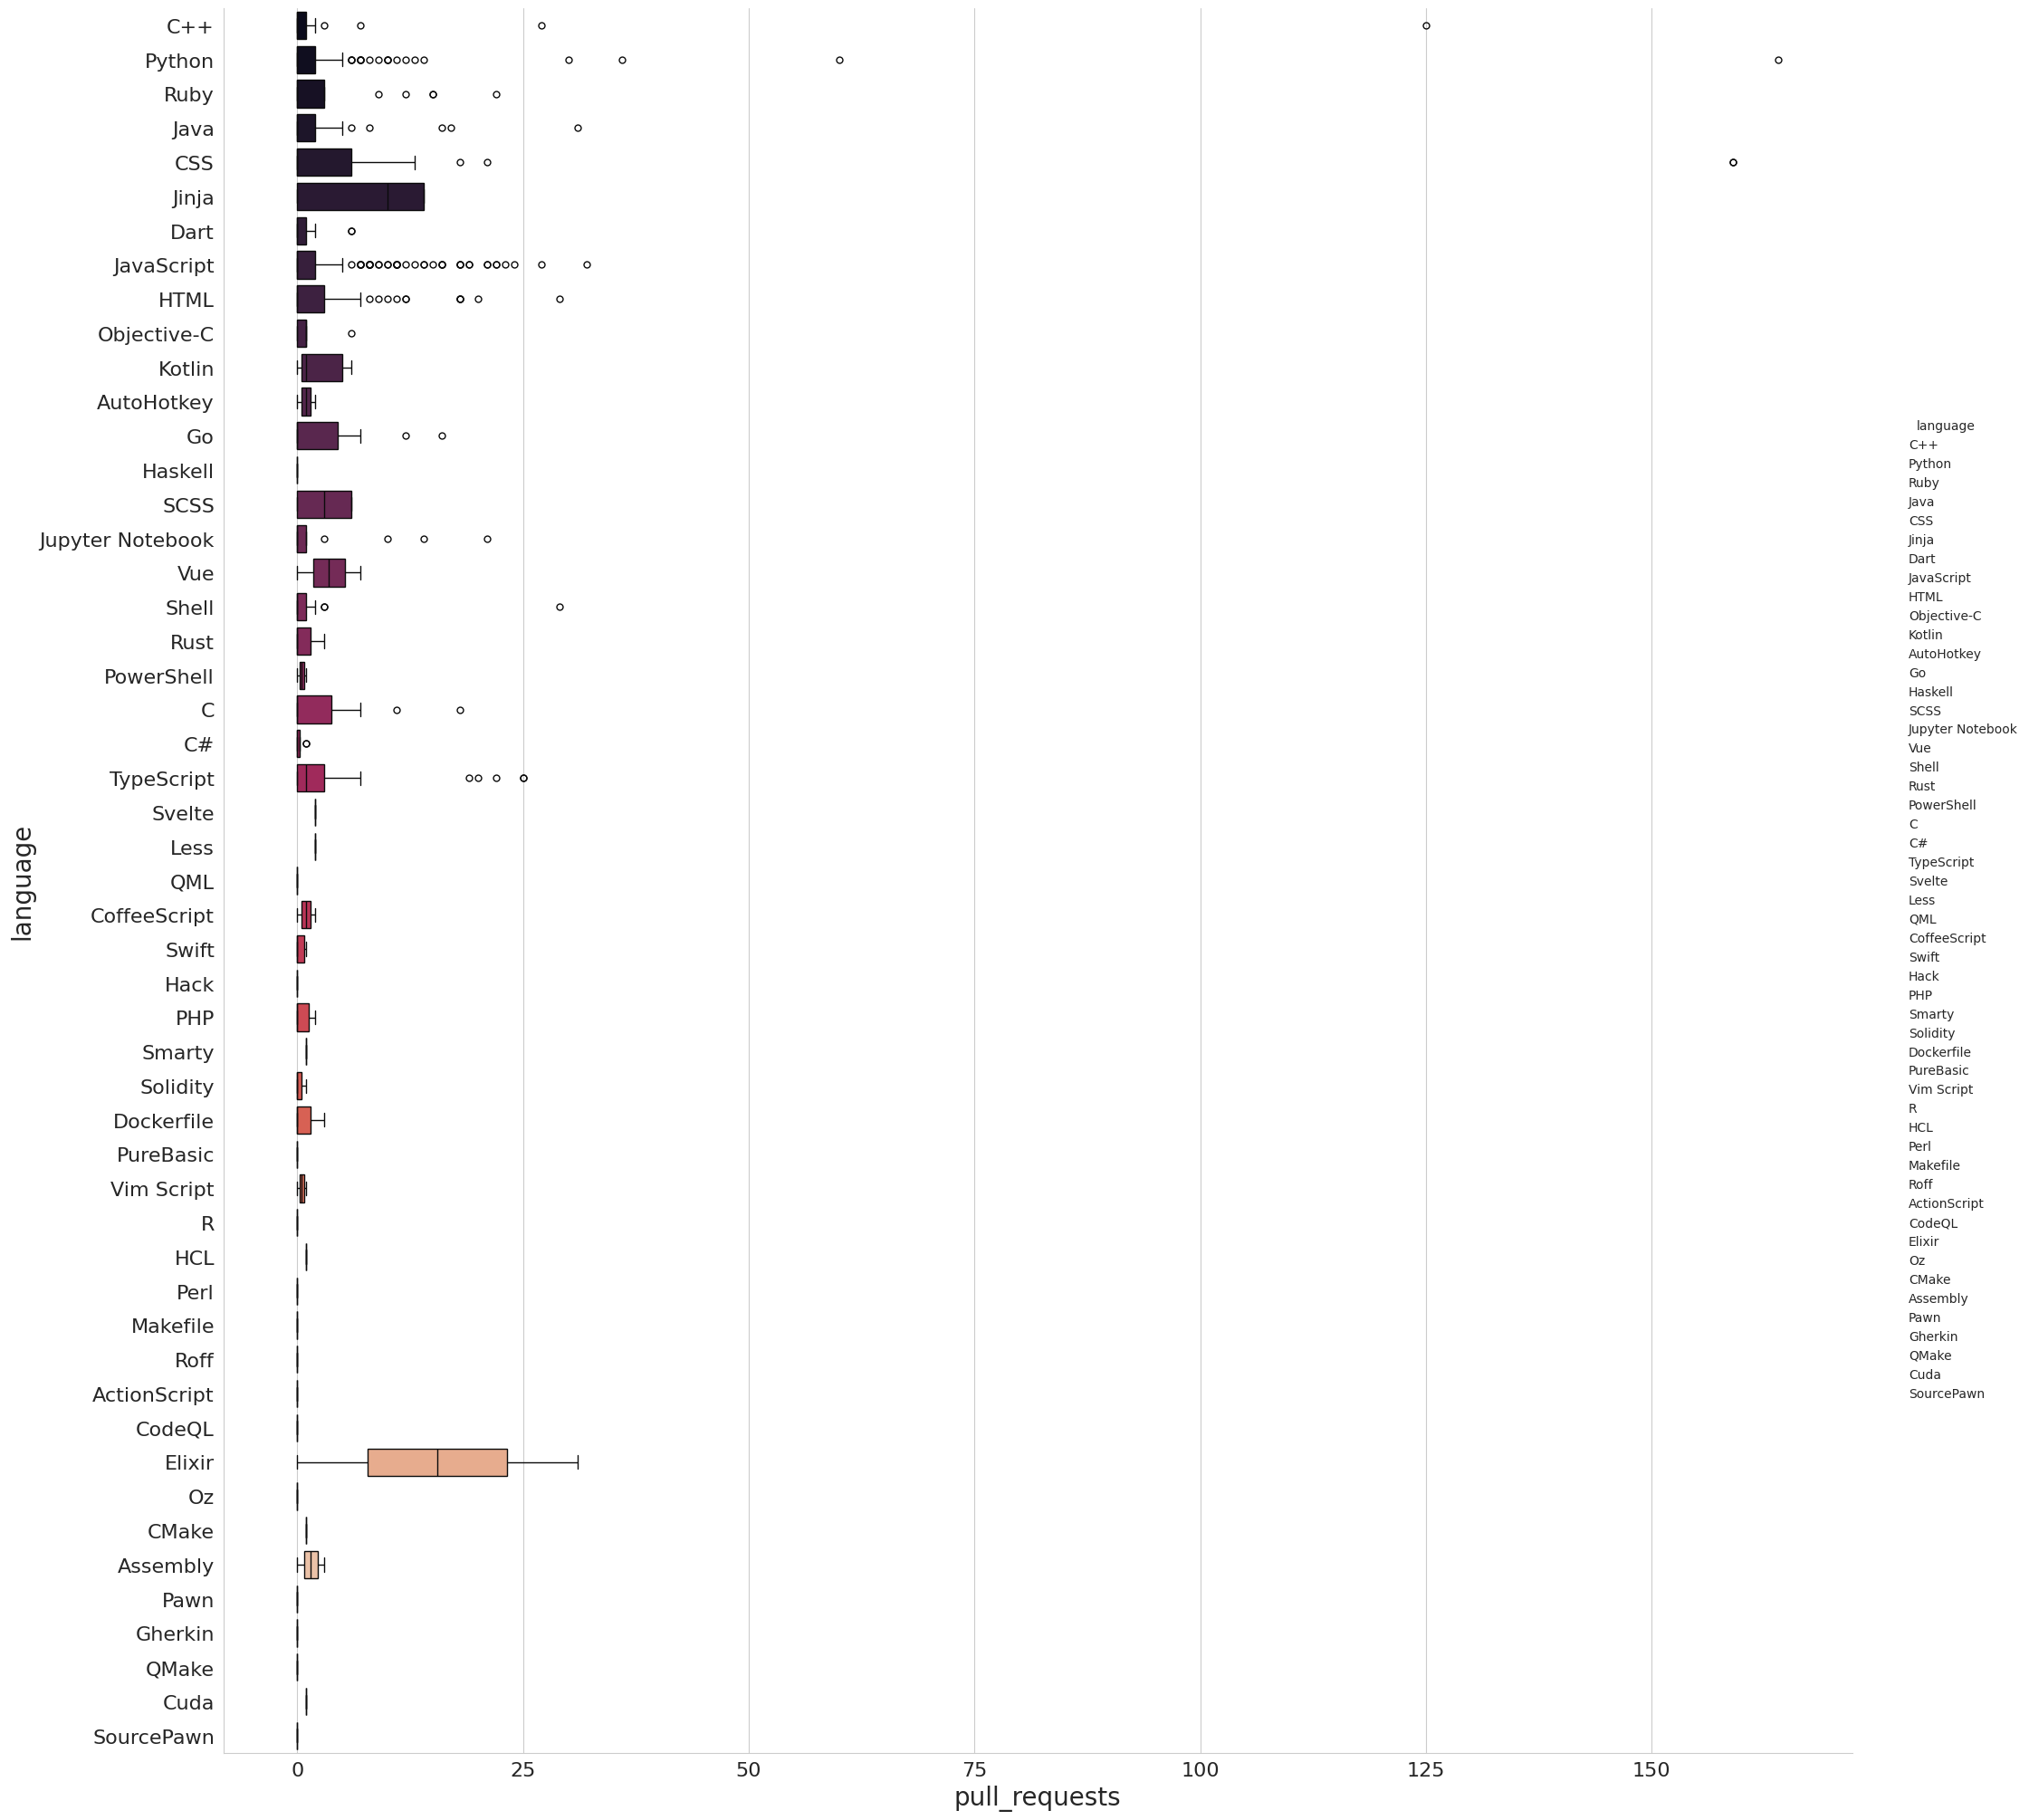

In [ ]:
sns.set_style("whitegrid")
pull_requests_box = sns.catplot(data=github_data, kind='box', y='language', x='pull_requests', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20)
plt.xlabel('pull_requests', fontsize=20)
plt.show()

<ipython-input-31-ef3b7c769f5b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  contributors_box = sns.catplot(data=github_data, kind='box', y='language', x='contributors', height=20, palette='rocket')


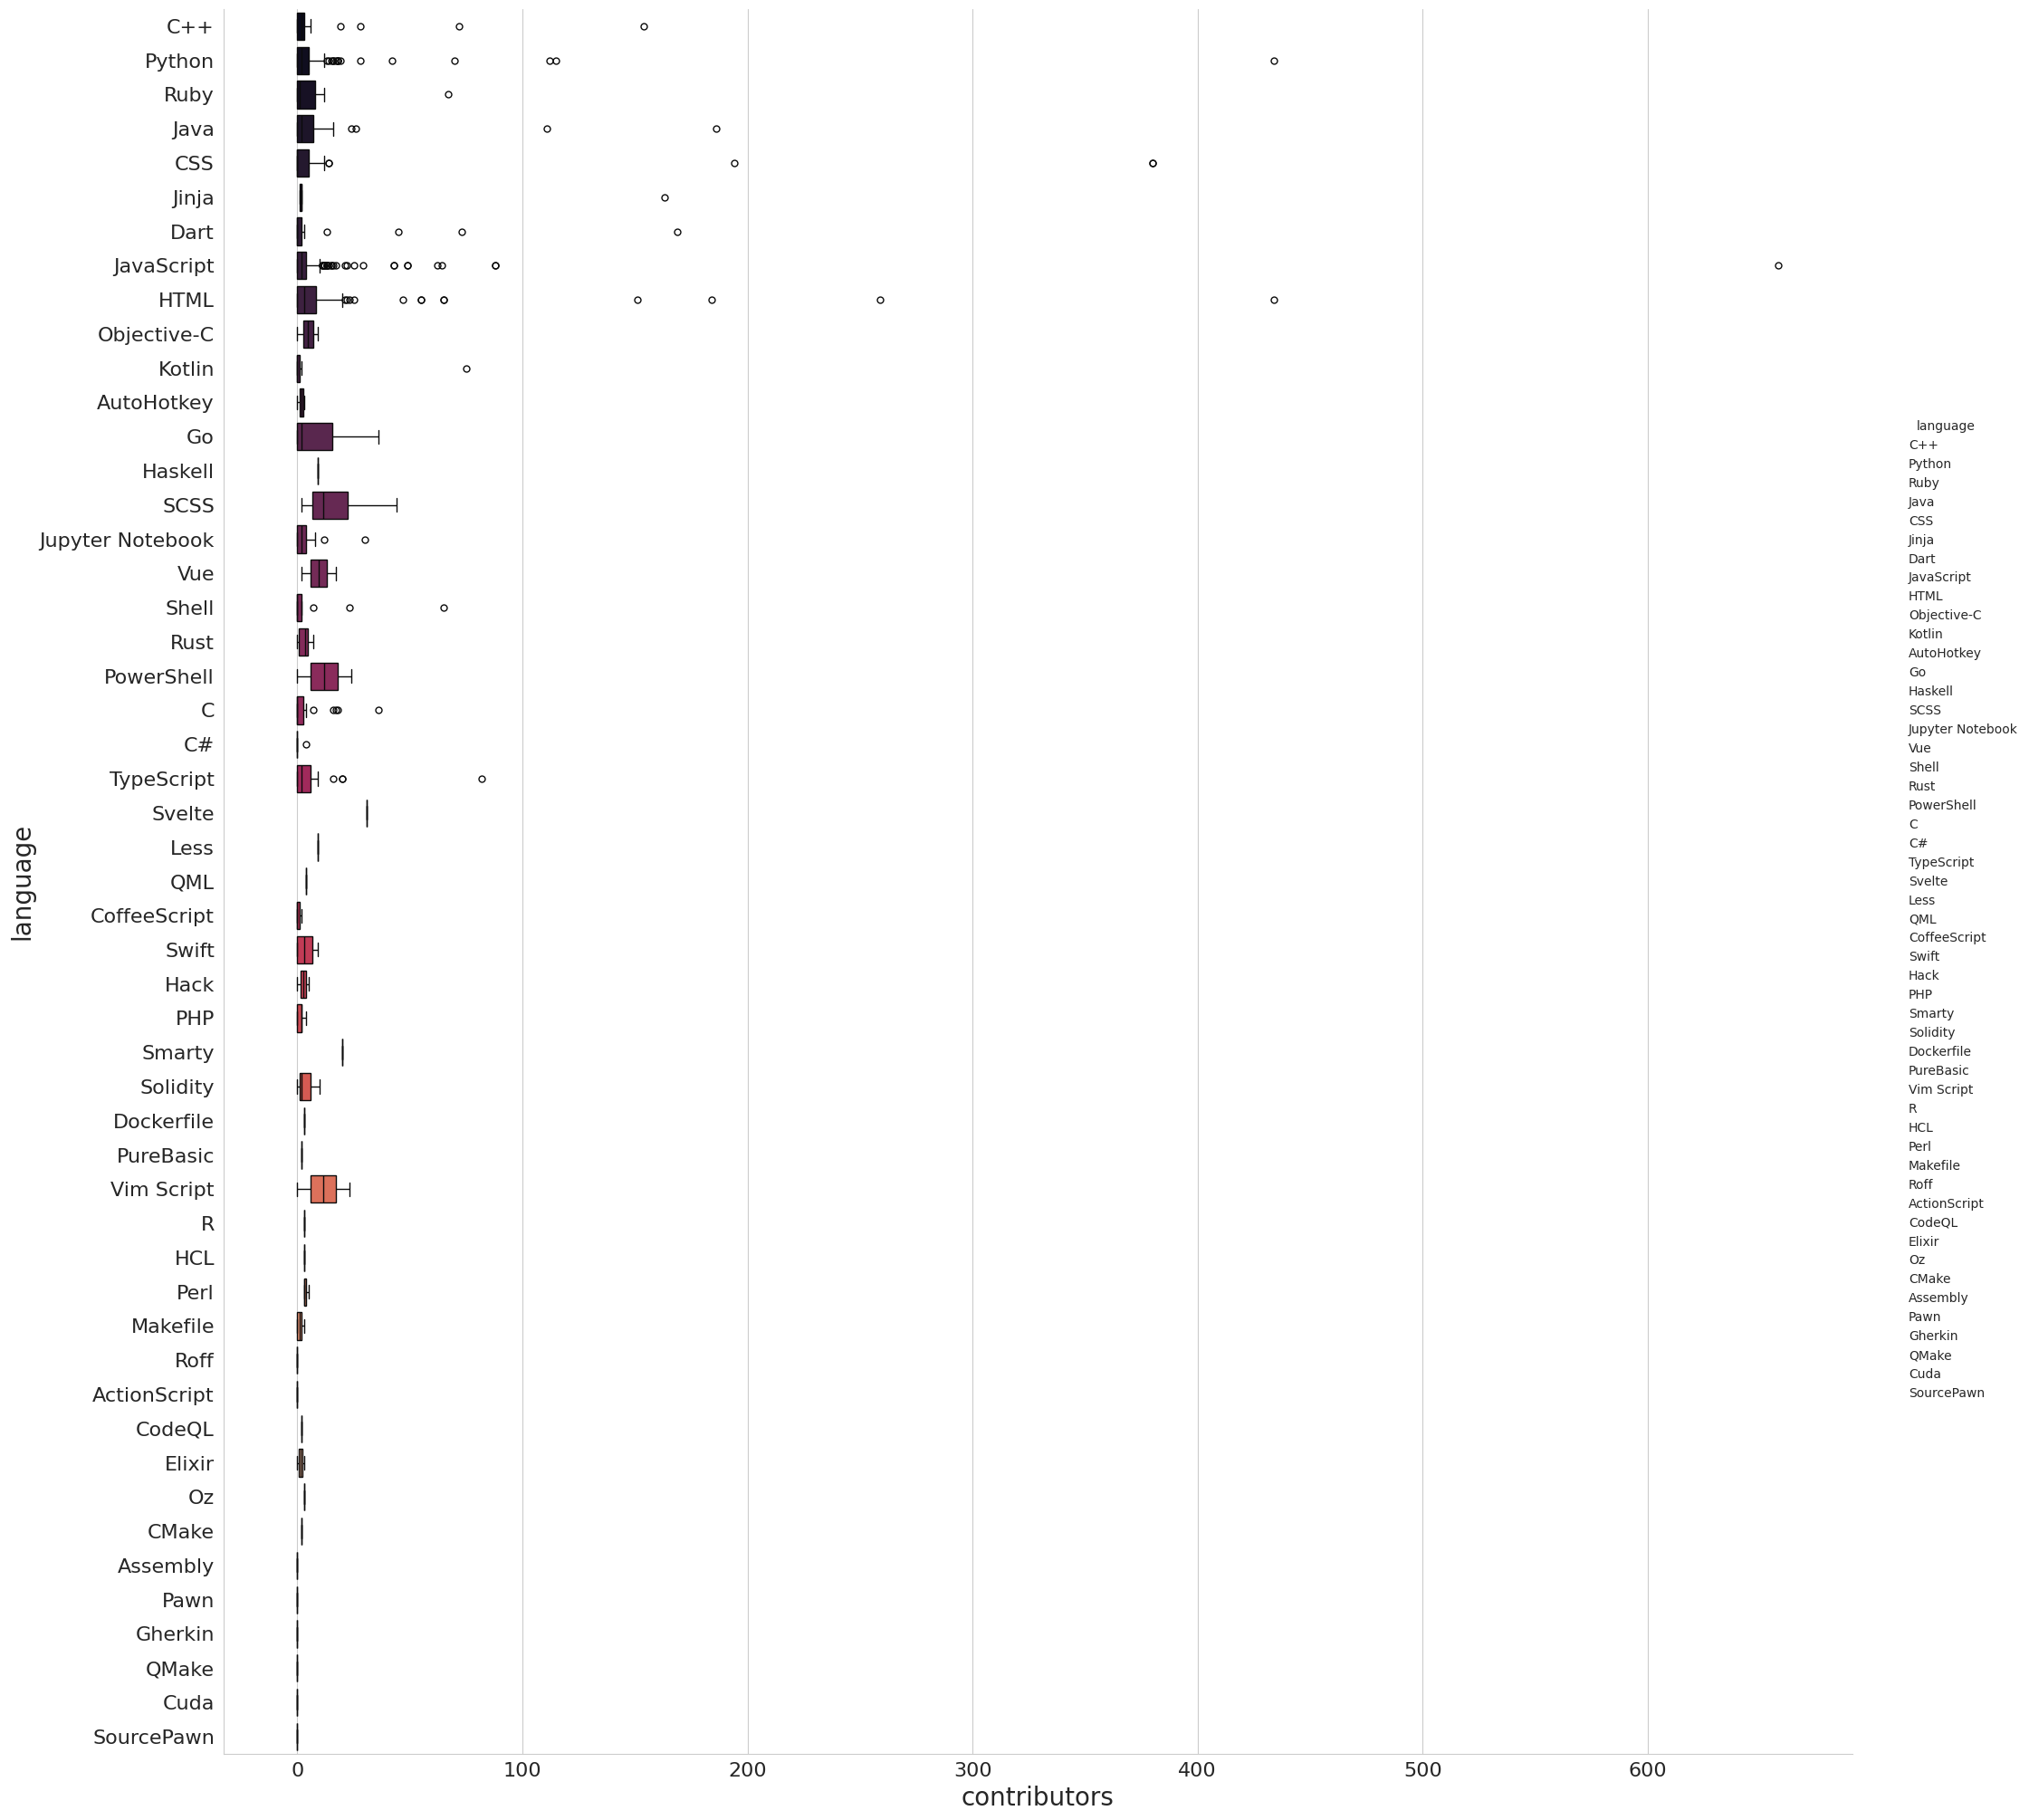

In [ ]:
sns.set_style("whitegrid")
contributors_box = sns.catplot(data=github_data, kind='box', y='language', x='contributors', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20)
plt.xlabel('contributors', fontsize=20)
plt.show()

In [ ]:
operation_counts = pd.DataFrame(list(github_data['stars_count']), columns=['counts'])
operation_counts = pd.DataFrame(operation_counts, columns=['operation', 'counts'])
operation_counts['operation'] = 'stars_count'
operation_counts

,operation,counts
0,stars_count,0
1,stars_count,271
2,stars_count,0
3,stars_count,0
4,stars_count,0
...,...,...
1047,stars_count,2
1048,stars_count,0
1049,stars_count,0
1050,stars_count,11


In [ ]:
operation_counts = operation_counts.append(pd.DataFrame([['forks_count', c] for c in list(github_data['forks_count'])], columns=['operation', 'counts']), ignore_index=True)
operation_counts

<ipython-input-33-40fb0c8730d3>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  operation_counts = operation_counts.append(pd.DataFrame([['forks_count', c] for c in list(github_data['forks_count'])], columns=['operation', 'counts']), ignore_index=True)


,operation,counts
0,stars_count,0
1,stars_count,271
2,stars_count,0
3,stars_count,0
4,stars_count,0
...,...,...
2099,forks_count,1
2100,forks_count,0
2101,forks_count,5
2102,forks_count,5


In [ ]:
operation_counts = operation_counts.append(pd.DataFrame([['issues_count', c] for c in list(github_data['issues_count'])], columns=['operation', 'counts']), ignore_index=True)
operation_counts

<ipython-input-34-1fff846342ab>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  operation_counts = operation_counts.append(pd.DataFrame([['issues_count', c] for c in list(github_data['issues_count'])], columns=['operation', 'counts']), ignore_index=True)


,operation,counts
0,stars_count,0
1,stars_count,271
2,stars_count,0
3,stars_count,0
4,stars_count,0
...,...,...
3151,issues_count,1
3152,issues_count,1
3153,issues_count,1
3154,issues_count,1


In [ ]:
operation_counts = operation_counts.append(pd.DataFrame([['pull_requests', c] for c in list(github_data['pull_requests'])], columns=['operation', 'counts']), ignore_index=True)
operation_counts

<ipython-input-35-55479eae0b13>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  operation_counts = operation_counts.append(pd.DataFrame([['pull_requests', c] for c in list(github_data['pull_requests'])], columns=['operation', 'counts']), ignore_index=True)


,operation,counts
0,stars_count,0
1,stars_count,271
2,stars_count,0
3,stars_count,0
4,stars_count,0
...,...,...
4203,pull_requests,0
4204,pull_requests,0
4205,pull_requests,1
4206,pull_requests,0


In [ ]:
operation_counts = operation_counts.append(pd.DataFrame([['contributors', c] for c in list(github_data['contributors'])], columns=['operation', 'counts']), ignore_index=True)
operation_counts

<ipython-input-36-189fc8b23b79>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  operation_counts = operation_counts.append(pd.DataFrame([['contributors', c] for c in list(github_data['contributors'])], columns=['operation', 'counts']), ignore_index=True)


,operation,counts
0,stars_count,0
1,stars_count,271
2,stars_count,0
3,stars_count,0
4,stars_count,0
...,...,...
5255,contributors,0
5256,contributors,8
5257,contributors,7
5258,contributors,0


<ipython-input-37-6b50ab94997c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  stars_count_box = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket')


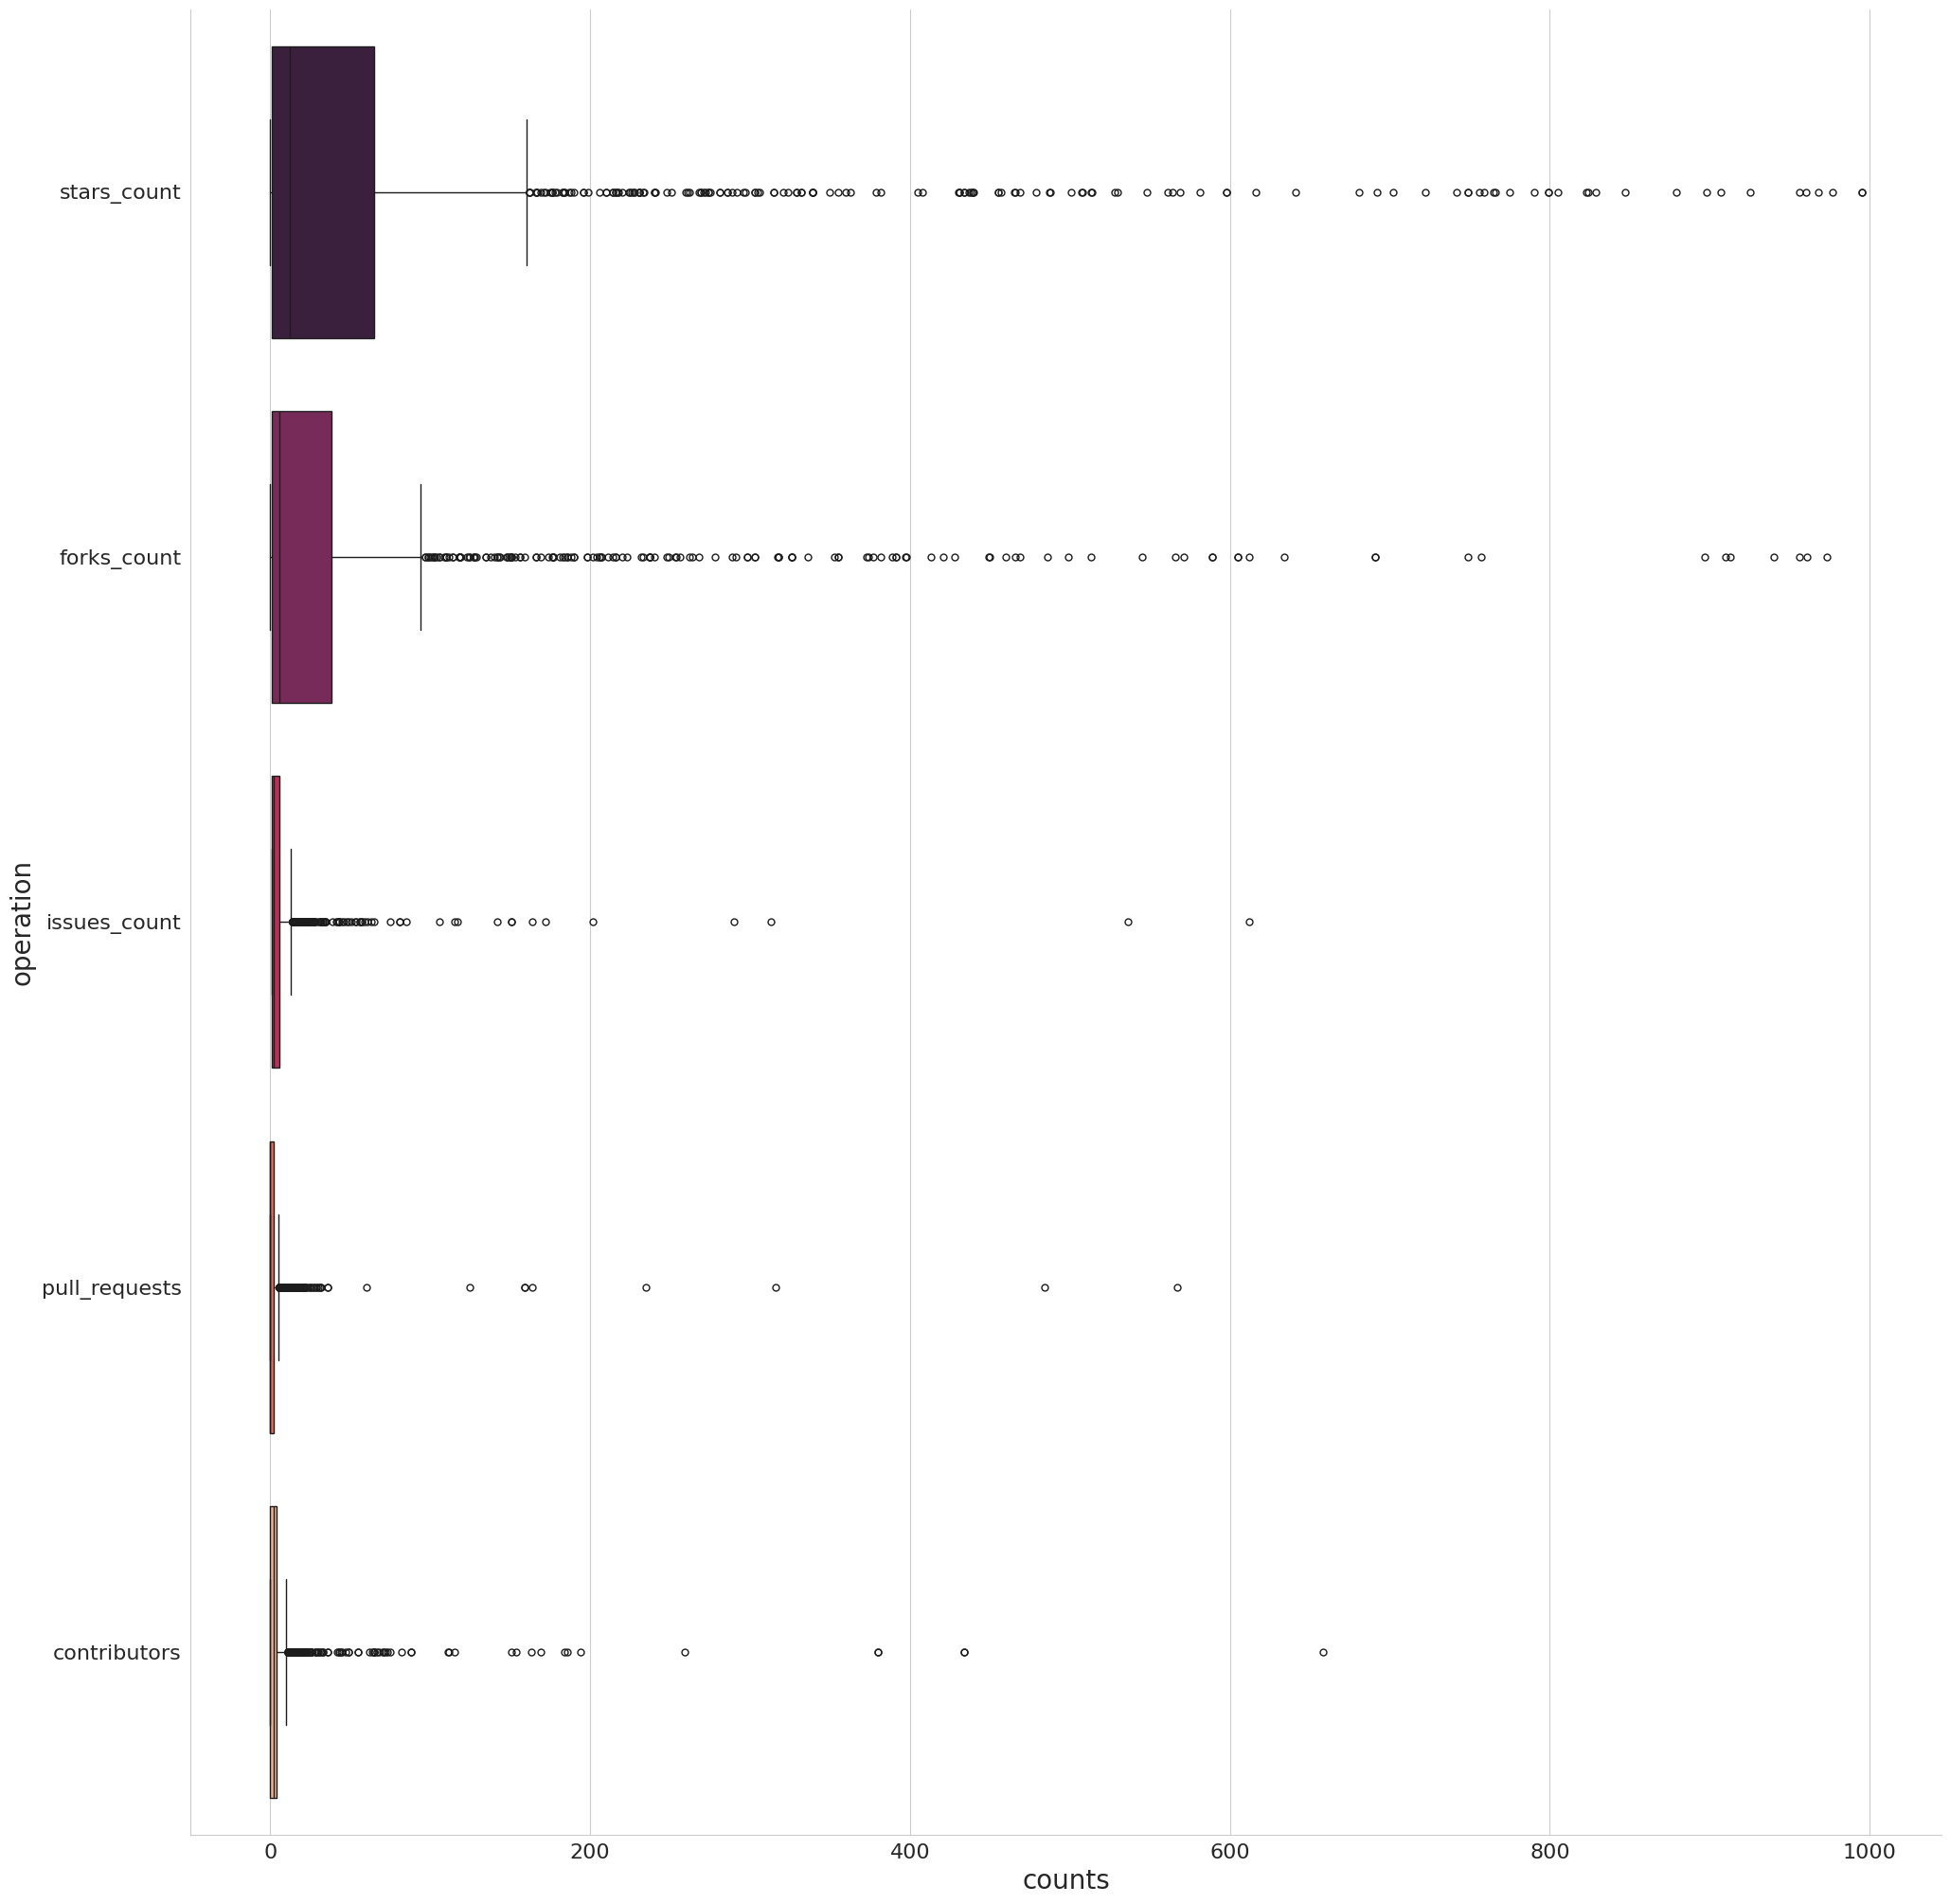

In [ ]:
sns.set_style("whitegrid")
stars_count_box = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('operation', fontsize=20, )
plt.xlabel('counts', fontsize=20)
plt.show()

<ipython-input-39-8f36ccdf592b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  stars_count_box_no_outliers = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket')


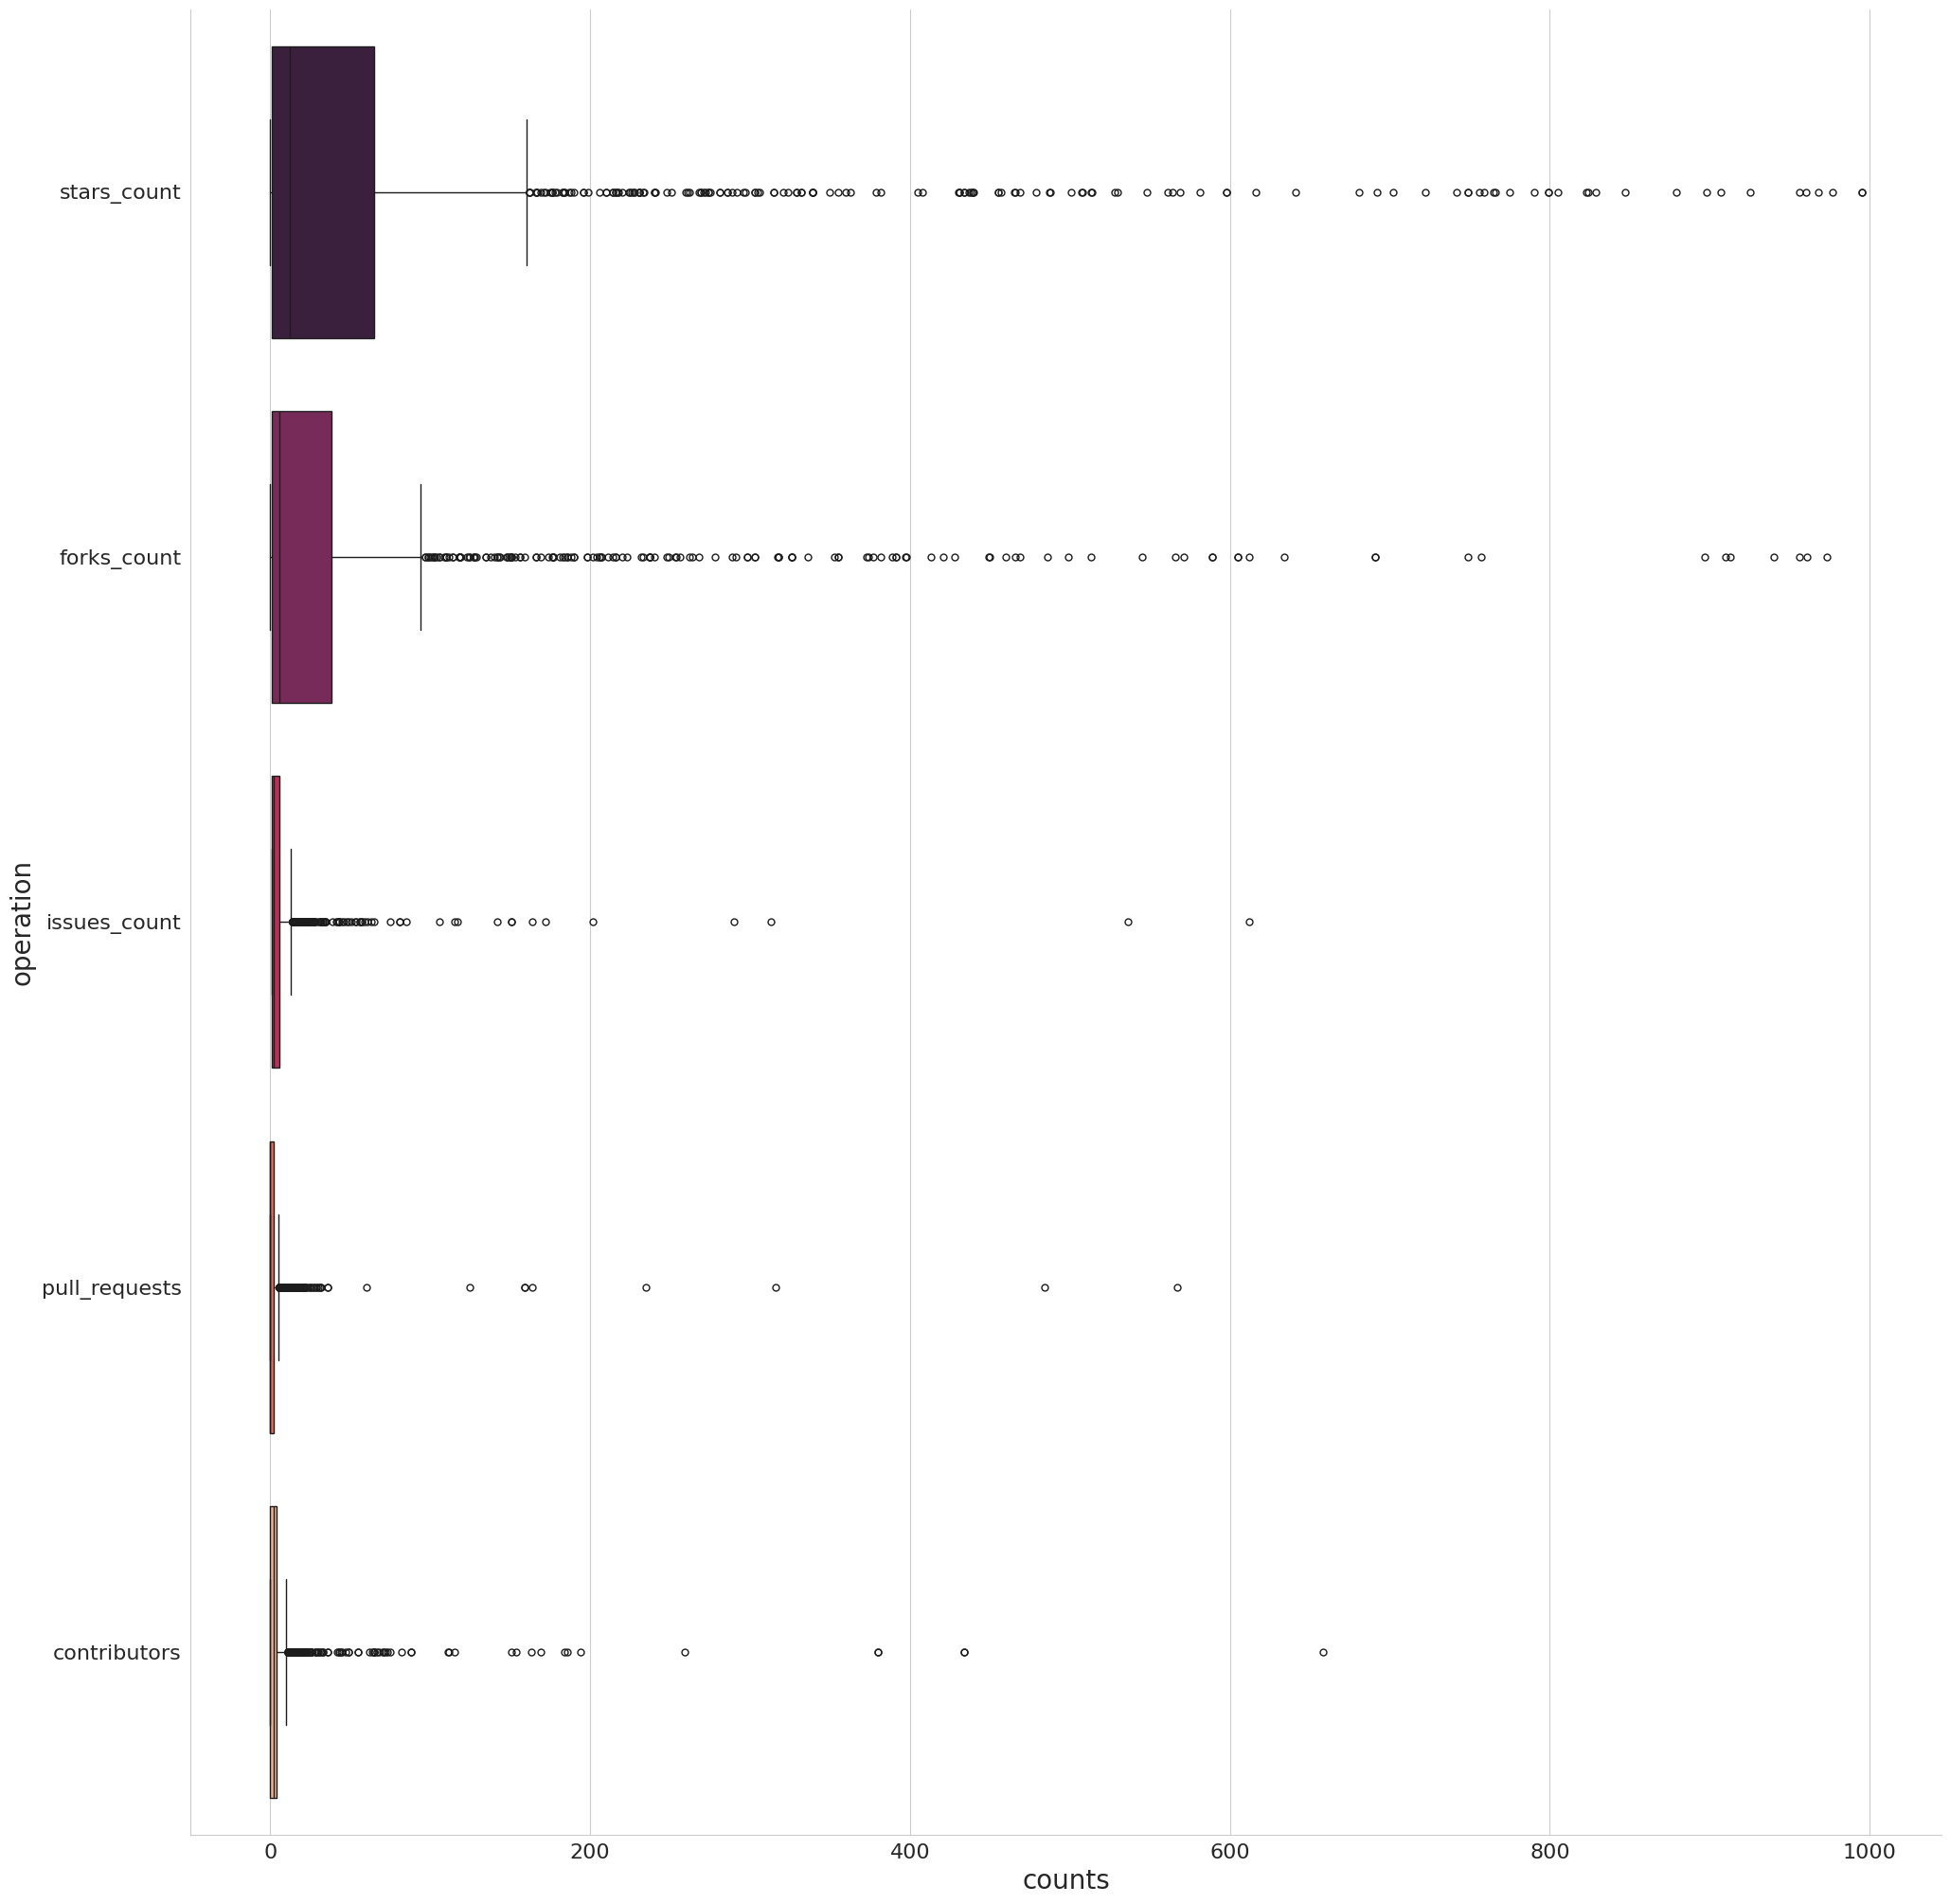

In [ ]:
sns.set_style("whitegrid")
# No outliers
stars_count_box_no_outliers = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('operation', fontsize=20, )
plt.xlabel('counts', fontsize=20)
plt.show()

## 3. 处理 NaN

### NaN Analysis

注意到只有在“language”列中存在NaN。 Github会自动识别项目的编程语言。 当没有主程序，并且存储库由非代码文档（例如.md）构成时，“language”信息可能为NaN。

### 删除 NaN


通过这种方法清理的数据集被命名为***github_data_cleaned***。

In [ ]:
from numpy import nan as NA

In [ ]:
github_data.isnull()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1047,False,False,False,False,False,False,False
1048,False,False,False,False,False,False,False
1049,False,False,False,False,False,False,False
1050,False,False,False,False,False,False,False


In [ ]:
# Delete rows containing NaN
github_data_cleaned = github_data.dropna()
github_data_cleaned

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
5,shobhit97/open-gpstracker,0,0,172,0,3,Java
6,donnemartin/system-design-primer,0,0,164,164,115,Python
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript


### 用最高频数的值替换NaN

通过这种方法清理的数据集被命名为***github_data_HF_replaced***。

In [ ]:
language_HF = language_counts.index[-1]
print('{} is the language with the highest frequency.'.format(language_HF))

JavaScript is the language with the highest frequency.


In [ ]:
github_data_HF_replaced = github_data.replace(np.nan, language_HF)
github_data_HF_replaced

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,JavaScript
1,EddieHubCommunity/support,271,150,536,6,71,JavaScript
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript



根据原始数据集，缺失的数据被替换为“JavaScript”，现在我们构建一个新的清理过的数据集***github_data_HF_replaced***.

### 根据属性之间的相关性补充NaN值。

通过这种方法清理的数据集被命名为***github_data_attr_corr***。

In [ ]:
df_coded = pd.get_dummies(github_data, columns=['language'], dummy_na=True, drop_first=True)
df_coded.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language_Assembly,language_AutoHotkey,language_C,language_C#,...,language_Shell,language_Smarty,language_Solidity,language_SourcePawn,language_Svelte,language_Swift,language_TypeScript,language_Vim Script,language_Vue,language_nan
0,octocat/Hello-World,0,0,612,316,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,EddieHubCommunity/support,271,150,536,6,71,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,ethereum/aleth,0,0,313,27,154,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,localstack/localstack,0,0,290,30,434,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,education/classroom,0,589,202,22,67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<ipython-input-46-ee8a509c0ba9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_coded.corr(method='spearman'), cmap='YlGnBu', annot=True)


Text(0.5, 1.0, 'Correlation Analysis')

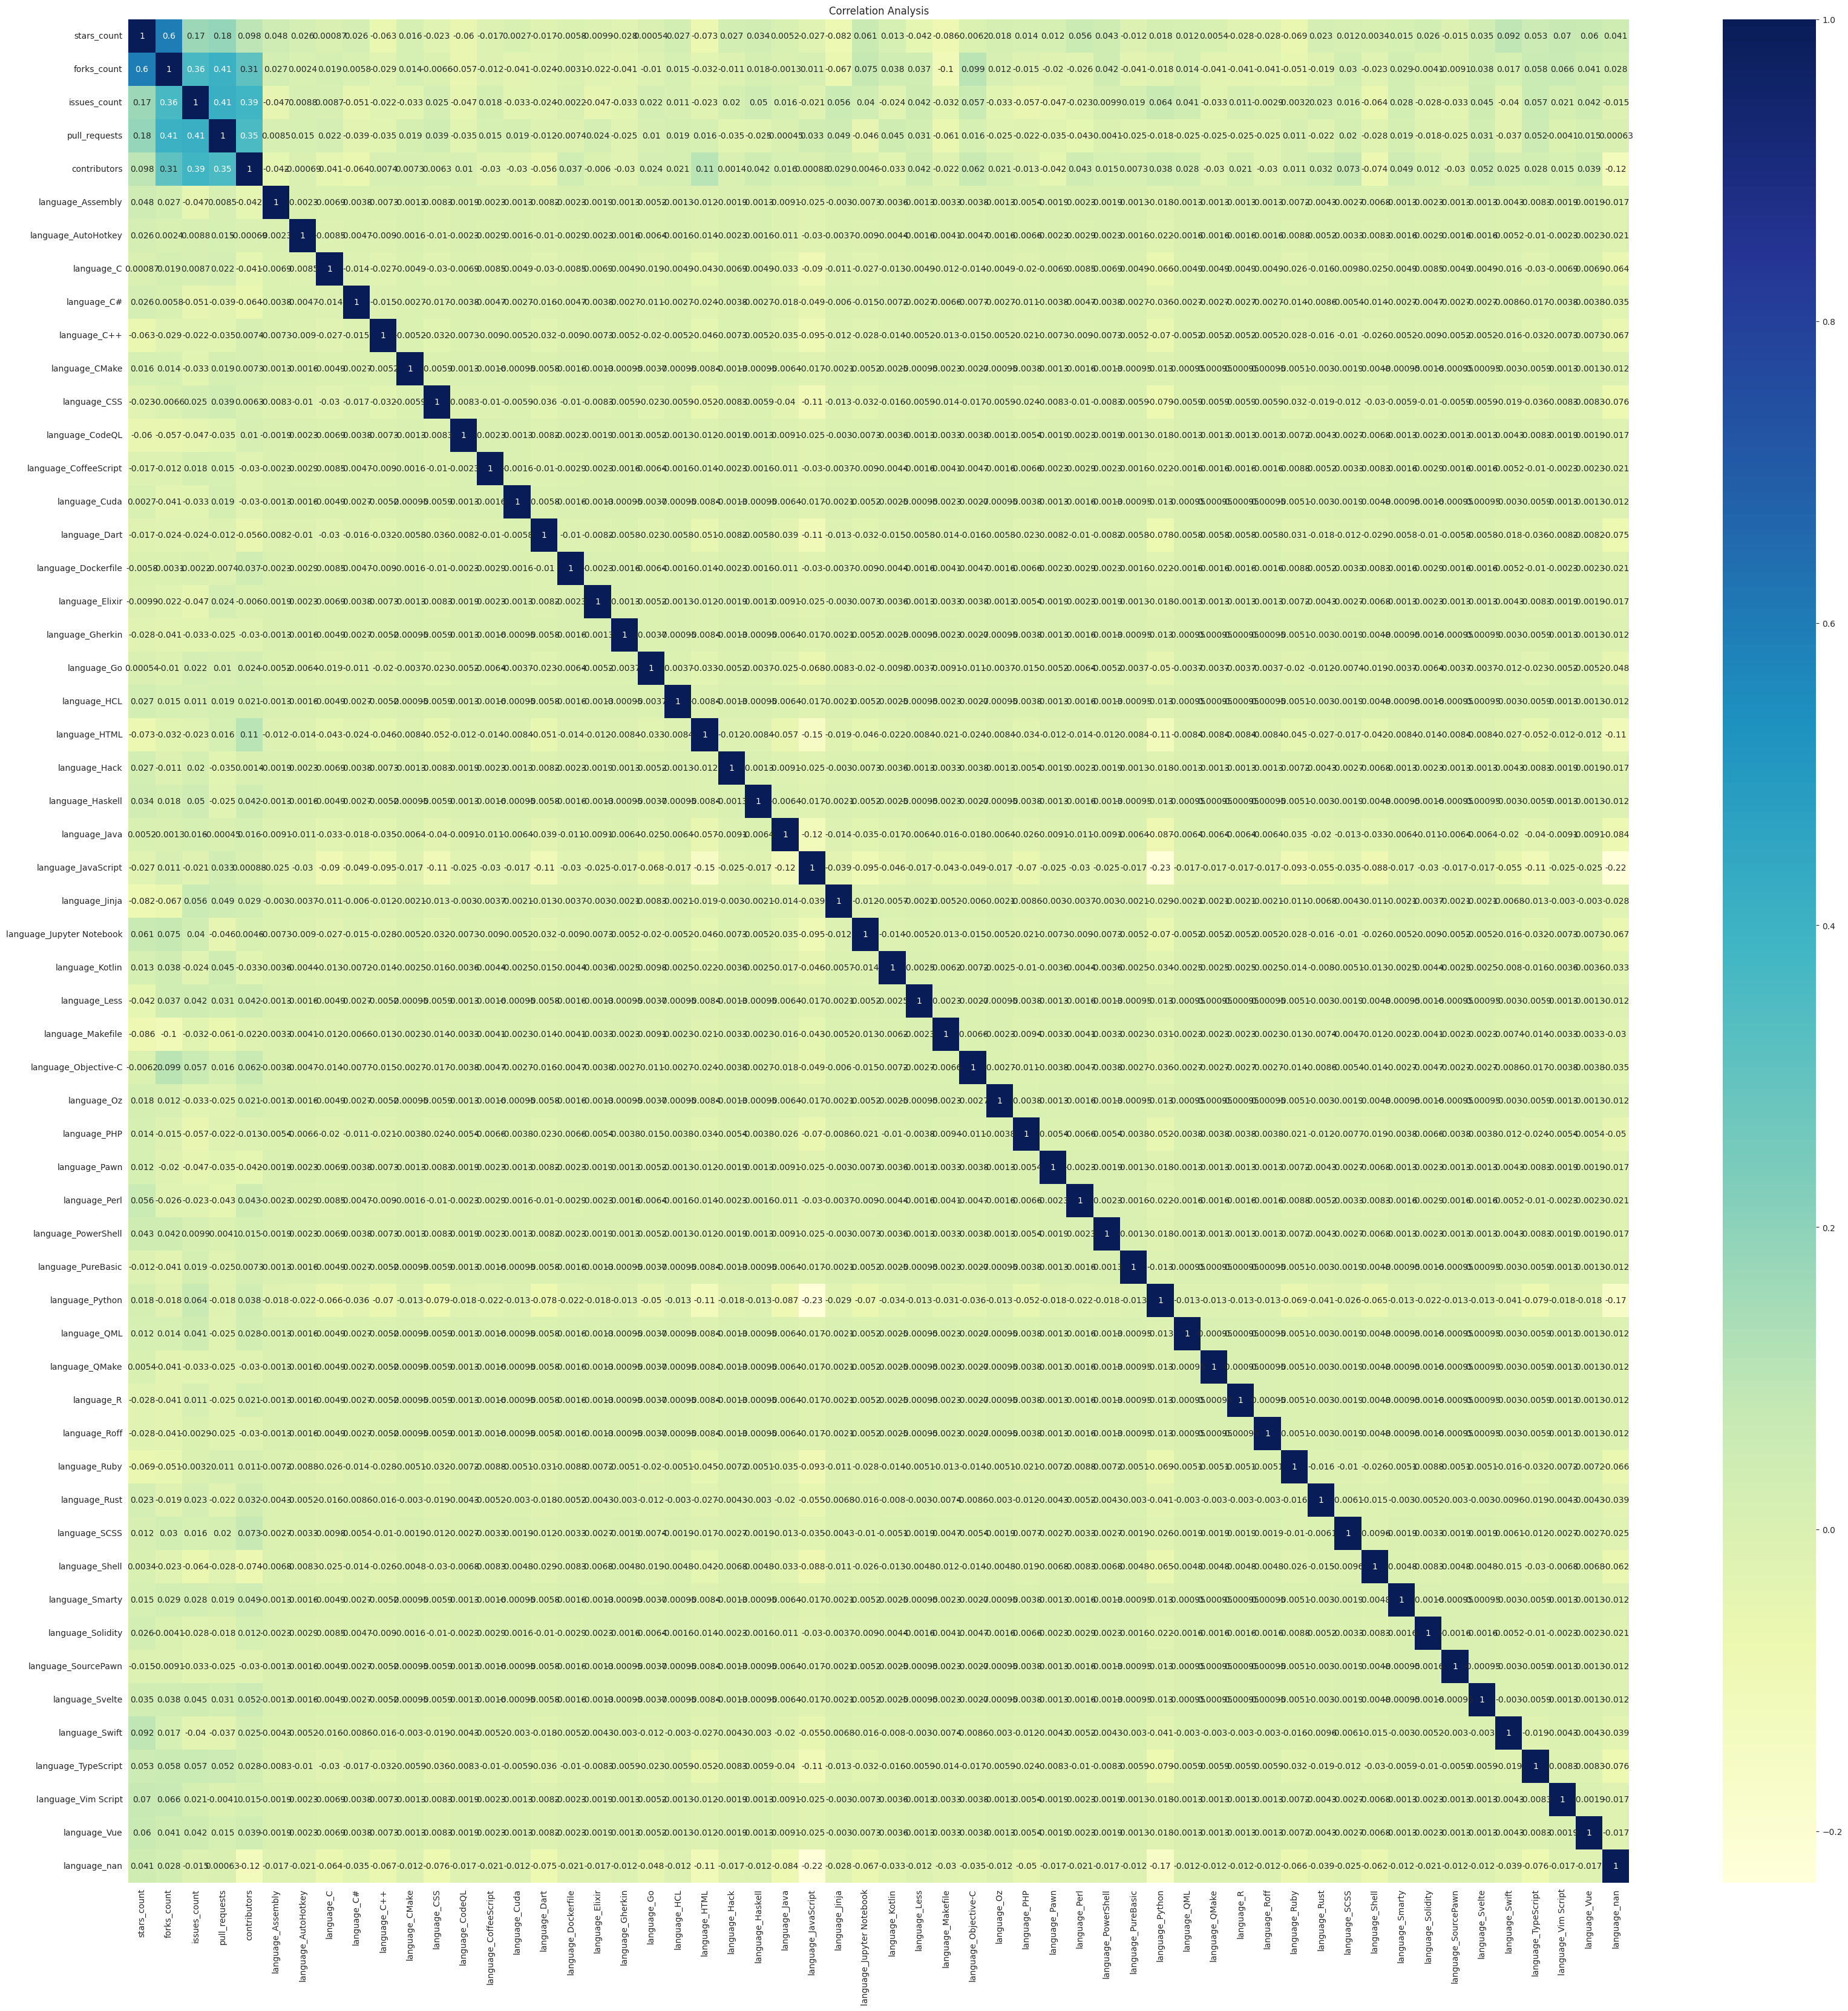

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(df_coded.corr(method='spearman'), cmap='YlGnBu', annot=True)
plt.title('Correlation Analysis')

在存储库中使用的语言与计数(star/fork/issue/pull/contributor)之间的相关性非常弱，因此使用相关性来完成缺失的数据并不是一个好的方法。

In [ ]:
github_data_attr_corr = github_data

In [ ]:
df1 = github_data_attr_corr.groupby('language').agg(avg=('stars_count', 'mean'))
df1

,avg
language,
ActionScript,3.000000
Assembly,426.000000
AutoHotkey,118.333333
C,153.076923
C#,43.250000
C++,39.172414
CMake,30.000000
CSS,49.675676
CodeQL,0.000000


In [ ]:
for i in range(len(github_data_attr_corr)):
    if github_data_attr_corr['language'].iloc[i] is NA:
        rate = github_data_attr_corr['stars_count'].iloc[i]
        dist = []
        for j in range(len(df1)):
            dist.append(abs(df1.iloc[j]['avg']-rate))
        idx = dist.index(min(dist))
        github_data_attr_corr['language'].iloc[i] = df1.index[idx]
github_data_attr_corr['language'].value_counts()

<ipython-input-49-424e55cee32e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  github_data_attr_corr['language'].iloc[i] = df1.index[idx]


JavaScript          257
Python              155
HTML                 72
Java                 44
CSS                  42
Dart                 38
TypeScript           38
C                    34
CodeQL               33
C++                  33
Jupyter Notebook     29
Ruby                 28
Shell                25
PHP                  17
Go                   17
Perl                 14
ActionScript         12
Swift                10
Rust                 10
C#                   10
Kotlin               10
Vim Script            9
CoffeeScript          9
Pawn                  8
Objective-C           8
Cuda                  7
Gherkin               7
SCSS                  7
Makefile              6
SourcePawn            6
AutoHotkey            5
QMake                 5
Jinja                 5
Assembly              4
PureBasic             4
Hack                  4
QML                   3
CMake                 3
Dockerfile            3
HCL                   3
Solidity              3
Elixir          

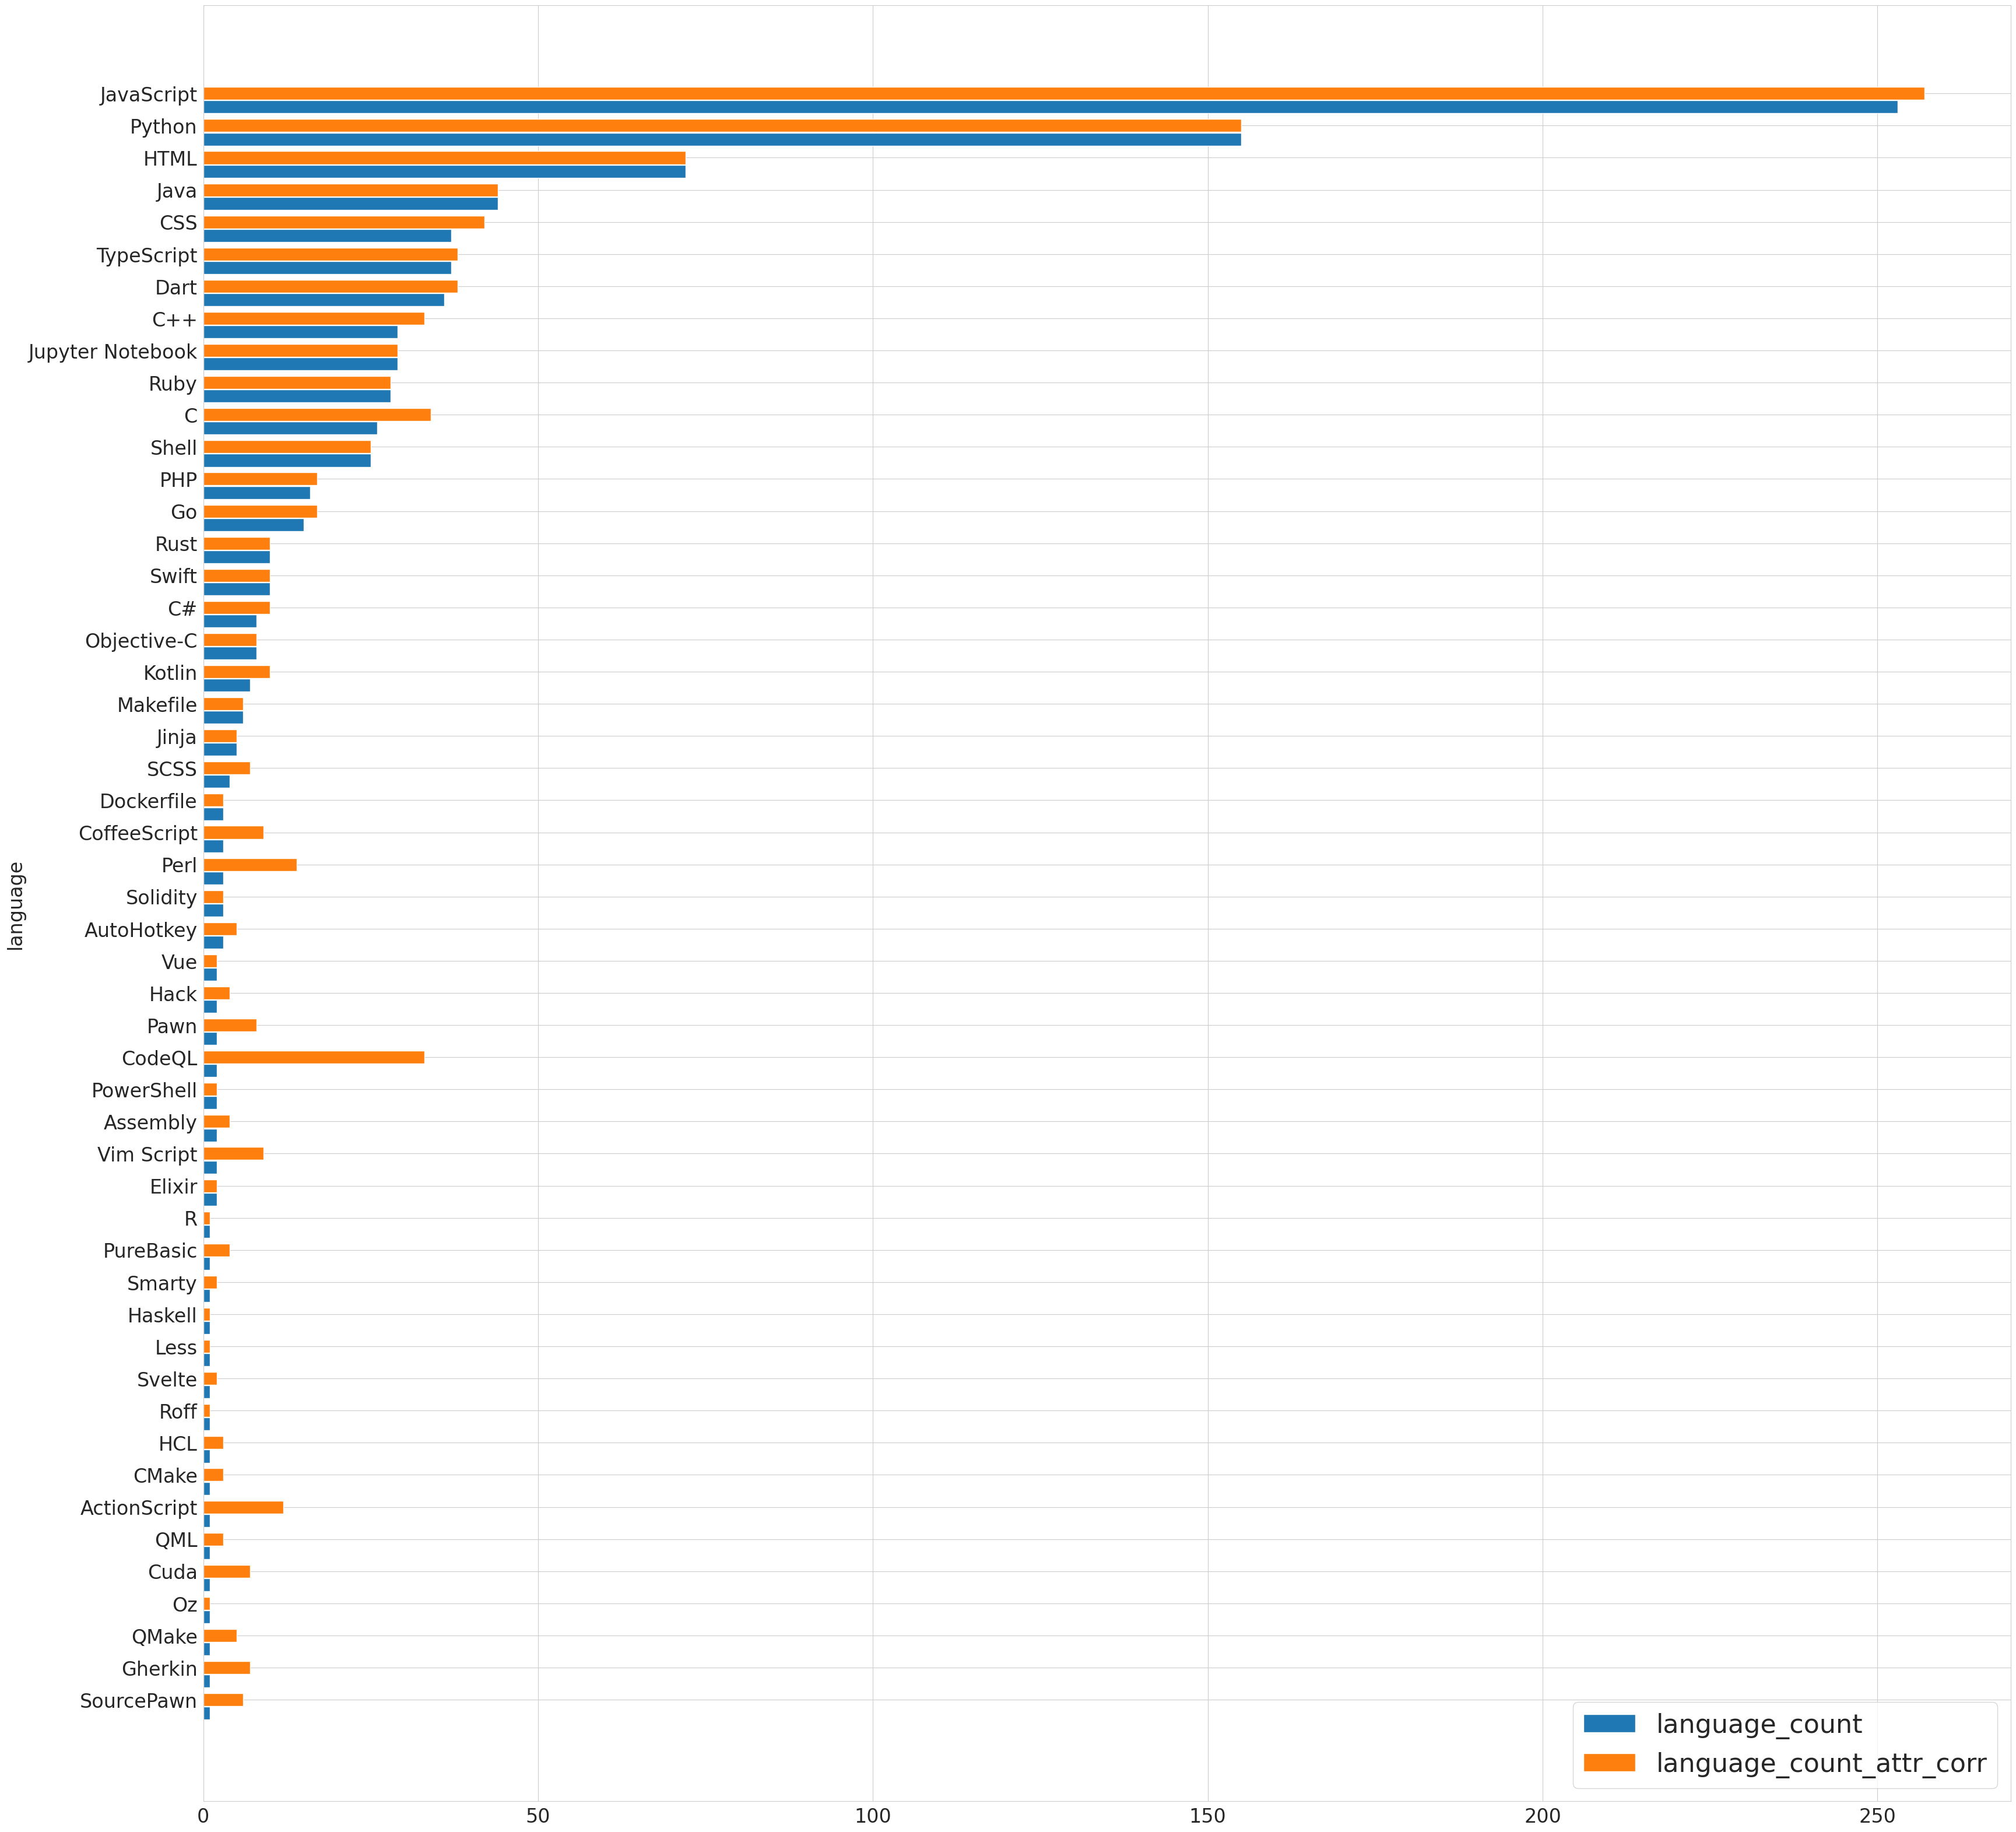

In [ ]:
language_count_attr_corr = language_counts
language_count_attr_corr['language_count_attr_corr'] = [0] * len(language_counts)

for level in list(language_counts.index):
    if level in list(github_data_attr_corr['language'].value_counts().index):
        language_count_attr_corr.loc[[level], ['language_count_attr_corr']] = github_data_attr_corr['language'].value_counts().loc[[level]].values[0]

plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(list(range(len(language_count_attr_corr))), tick_label=language_count_attr_corr.index, width=language_count_attr_corr['language_count'], label='language_count', height=0.4)
plt.barh([d+0.42 for d in list(range(len(language_count_attr_corr)))], tick_label=language_count_attr_corr.index, width=language_count_attr_corr['language_count_attr_corr'], label='language_count_attr_corr', height=0.4)
plt.ylabel('language', fontsize=24)
plt.xlabel('', fontsize=24)
# plt.title('Number of movies for each appropriation-level?', fontsize=32, loc='center')
plt.legend(fontsize=32, loc='lower right')
plt.show()

这个结果表明，这种方法使原始分布更加平滑。

### 根据样本之间的相关性替换NaN值

通过这种方法清理的数据集被命名为***github_data_sample_corr***。

In [ ]:
github_data_sample_corr = github_data

In [ ]:
def regularit(df):
    new_df = pd.DataFrame(index=df.index)
    columns = ['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors']
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        new_df[c] = ((d - MIN) / (d - MAX))
    return new_df

In [ ]:
normal_github_data = regularit(github_data_sample_corr)
normal_github_data

,stars_count,forks_count,issues_count,pull_requests,contributors
0,-0.000000,-0.000000,inf,-1.258964,-0.003049
1,-0.374309,-0.182260,-7.039474,-0.010695,-0.120954
2,-0.000000,-0.000000,-1.043478,-0.050000,-0.305556
3,-0.000000,-0.000000,-0.897516,-0.055866,-1.937500
4,-0.000000,-1.533854,-0.490244,-0.040367,-0.113367
...,...,...,...,...,...
1047,-0.002014,-0.001029,-0.000000,-0.000000,-0.000000
1048,-0.000000,-0.000000,-0.000000,-0.000000,-0.012308
1049,-0.000000,-0.005165,-0.000000,-0.001767,-0.010753
1050,-0.011179,-0.005165,-0.000000,-0.000000,-0.000000


In [ ]:
normal_language = pd.concat([normal_github_data, github_data_sample_corr['language']], axis=1)
normal_language

,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,-0.000000,-0.000000,inf,-1.258964,-0.003049,CodeQL
1,-0.374309,-0.182260,-7.039474,-0.010695,-0.120954,Perl
2,-0.000000,-0.000000,-1.043478,-0.050000,-0.305556,C++
3,-0.000000,-0.000000,-0.897516,-0.055866,-1.937500,Python
4,-0.000000,-1.533854,-0.490244,-0.040367,-0.113367,Ruby
...,...,...,...,...,...,...
1047,-0.002014,-0.001029,-0.000000,-0.000000,-0.000000,Dart
1048,-0.000000,-0.000000,-0.000000,-0.000000,-0.012308,HTML
1049,-0.000000,-0.005165,-0.000000,-0.001767,-0.010753,Python
1050,-0.011179,-0.005165,-0.000000,-0.000000,-0.000000,JavaScript


In [ ]:
infos = []
for i in range(len(normal_language)):
    info = []
    star = normal_language['stars_count'].iloc[i]
    fork = normal_language['forks_count'].iloc[i]
    issue = normal_language['issues_count'].iloc[i]
    pull = normal_language['pull_requests'].iloc[i]
    contributor = normal_language['contributors'].iloc[i]
    info.append(star)
    info.append(fork)
    info.append(issue)
    info.append(pull)
    info.append(contributor)
    infos.append(info)

In [ ]:
for i in range(len(normal_language)):
    if normal_language['language'].iloc[i] is NA:
        dists = []
        for j in len(rates):
            dist = np.sqrt(np.sum(np.square(infos[i] - infos[j])))
            dists.append(dist)
        idx = dists.index(min(dists))
        github_data_sample_corr['language'].iloc[i] = github_data_sample_corr['language'].iloc[idx]
github_data_sample_corr['language'].value_counts()

JavaScript          257
Python              155
HTML                 72
Java                 44
CSS                  42
Dart                 38
TypeScript           38
C                    34
CodeQL               33
C++                  33
Jupyter Notebook     29
Ruby                 28
Shell                25
PHP                  17
Go                   17
Perl                 14
ActionScript         12
Swift                10
Rust                 10
C#                   10
Kotlin               10
Vim Script            9
CoffeeScript          9
Pawn                  8
Objective-C           8
Cuda                  7
Gherkin               7
SCSS                  7
Makefile              6
SourcePawn            6
AutoHotkey            5
QMake                 5
Jinja                 5
Assembly              4
PureBasic             4
Hack                  4
QML                   3
CMake                 3
Dockerfile            3
HCL                   3
Solidity              3
Elixir          

这结果与之前的方法非常相似。原因可能是我们在这里使用的计数属性高度相关，因此当我们使用它们来衡量样本之间的相关性时，结果变化不大。